# <a name = 'link0'>Introduction</a>

As other businesses, banks make business by selling services. The most important bank service is money lending. It is therefore vital for any banking institution to find ways to have new borrowers. In this work, we built two predicting models to help `All Life Bank` find new loan purchasers among its customers: A `Logistic Regression` model and a `Decision Tree` model.

Teh present work is structured as follow:

- <a href = #link0>Introduction</a>
- <a href = #link1>Loading packages and data overview</a>
    - <a href = #link11>Importing necessary packages</a>
    - <a href = #link12>Dataset and data structures</a>
- <a href = #link2>Data preprocessing and Exploratory data analysis</a>
    - <a href = #link21>Exploratory data analysis</a>
    - <a href = #link22>Datatype Fixing</a>
    - <a href = #link23>Outliers treatment</a>
- <a href = #link3>Modeling</a>
    - <a href = #link31>Data preparation for modeling</a>
    - <a href = #link32> Logistic Regression</a>
    - <a href = #link33>Decision Tree</a>
    - <a href = #link34>Logistic Regression and Decision Tree models comparison</a>
- <a href = #link4>Conclusion</a>

# <a name = 'link1'>1. Loading packeages and data overview</a>

## <a name = 'link11'>1.1. Importing necessary packages</a>

In [442]:
# Importing useful packages

import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import sklearn.tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score, roc_curve,precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.api import Logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
pd.options.display.float_format = '{:.5f}'.format
warnings.filterwarnings("ignore")
#%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# <a name = 'link12'>1.2. Dataset and data structure</a>

In [443]:
# We load a copy of the dataset in the variable named bank

allLife = pd.read_csv('Loan_Modelling.csv')
bank = allLife.copy()

In [444]:
#Checking the shape of the dataset

bank.shape

(5000, 14)

The dataset includes 5000 observations of 14 differents variables

In [445]:
#Let's take a glance at the data
bank.head()

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4 1.60000          1         0   
1   2   45          19      34    90089       3 1.50000          1         0   
2   3   39          15      11    94720       1 1.00000          1         0   
3   4   35           9     100    94112       1 2.70000          2         0   
4   5   35           8      45    91330       4 1.00000          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [446]:
# Checking the number of unique values per variables

for col in bank.columns:
    print(f"Column {col} has {bank[col].nunique()} different values.")
    print('*'*40, '\n')
    
    

Column ID has 5000 different values.
**************************************** 

Column Age has 45 different values.
**************************************** 

Column Experience has 47 different values.
**************************************** 

Column Income has 162 different values.
**************************************** 

Column ZIPCode has 467 different values.
**************************************** 

Column Family has 4 different values.
**************************************** 

Column CCAvg has 108 different values.
**************************************** 

Column Education has 3 different values.
**************************************** 

Column Mortgage has 347 different values.
**************************************** 

Column Personal_Loan has 2 different values.
**************************************** 

Column Securities_Account has 2 different values.
**************************************** 

Column CD_Account has 2 different values.
*********************************

In [447]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Note:**
    
- All the data are supplied, so there is no missing values
- The data are of the good datatype, except for binary and ordinal ones that should be categorical.

In [448]:
bank.describe(percentiles=[.01,.25, .5, .75, .99]).T

count        mean        std         min          1%  \
ID                 5000.00000  2500.50000 1443.52000     1.00000    50.99000   
Age                5000.00000    45.33840   11.46317    23.00000    25.00000   
Experience         5000.00000    20.10460   11.46795    -3.00000    -1.00000   
Income             5000.00000    73.77420   46.03373     8.00000    10.00000   
ZIPCode            5000.00000 93169.25700 1759.45509 90005.00000 90024.00000   
Family             5000.00000     2.39640    1.14766     1.00000     1.00000   
CCAvg              5000.00000     1.93794    1.74766     0.00000     0.00000   
Education          5000.00000     1.88100    0.83987     1.00000     1.00000   
Mortgage           5000.00000    56.49880  101.71380     0.00000     0.00000   
Personal_Loan      5000.00000     0.09600    0.29462     0.00000     0.00000   
Securities_Account 5000.00000     0.10440    0.30581     0.00000     0.00000   
CD_Account         5000.00000     0.06040    0.23825     0.00000     0.00000   
Online             5000.00000     0.59680    0.49059     0.00000     0.00000   
CreditCard         5000.00000     0.29400    0.45564     0.00000     0.00000   

                           25%         50%         75%         99%         max  
ID                  1250.75000  2500.50000  3750.25000  4950.01000  5000.00000  
Age                   35.00000    45.00000    55.00000    65.00000    67.00000  
Experience            10.00000    20.00000    30.00000    41.00000    43.00000  
Income                39.00000    64.00000    98.00000   193.00000   224.00000  
ZIPCode            91911.00000 93437.00000 94608.00000 95929.00000 96651.00000  
Family                 1.00000     2.00000     3.00000     4.00000     4.00000  
CCAvg                  0.70000     1.50000     2.50000     8.00000    10.00000  
Education              1.00000     2.00000     3.00000     3.00000     3.00000  
Mortgage               0.00000     0.00000   101.00000   431.01000   635.00000  
Personal_Loan          0.00000     0.00000     0.00000     1.00000     1.00000  
Securities_Account     0.00000     0.00000     0.00000     1.00000     1.00000  
CD_Account             0.00000     0.00000     0.00000     1.00000     1.00000  
Online                 0.00000     1.00000     1.00000     1.00000     1.00000  
CreditCard             0.00000     0.00000     1.00000     1.00000     1.00000

**Note:**

- `Experience` has some abnormal negative values. We would take care of them later.
- `Mortgage`, `Income` and `CCAvg` have some large values. We will have to decide how to handle them.
-`ZIPCode` has given in the dataset do not give us any information. We will need to see how to use them to extract some useful information about the bank's customers.

### Extracting City, County and State informations from the ZIPCode.

In [449]:
from uszipcode import SearchEngine

In [450]:
# Function to create City, County and State columns in the dataframe from ZIPCode

def zip_to_city_state(df, col="ZIPCode", city = "City", county="County", state = "State"):
    
    """
        The function create three additionnal columns in the bankframe to store City name, County name,
        and State for each observation based on zipcode.
    """
    search = SearchEngine(simple_zipcode=True)
    for idx in df.index:
        zips = df.loc[idx, col]
        res = search.by_zipcode(zips)
        if res:
            df.loc[idx, city] = res.major_city
            df.loc[idx, county] = res.county
            df.loc[idx, state] = res.state
        else:
            df.loc[idx, city] = "Unknown"
            df.loc[idx, county] = "Unknown"
            df.loc[idx, state] = "Unknown"
            
    return df

In [451]:
bank = zip_to_city_state(bank)

In [452]:
bank[bank.ZIPCode==94598]

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  \
4867  4868   38          12      61    94598       4 0.20000          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4867         0              0                   0           0       1   

      CreditCard          City               County State  
4867           0  Walnut Creek  Contra Costa County    CA

**Observation:**
    
`City`, `County` and `State` were successfully added to our dataset.

In [453]:
#Let's see if any observations in City, County and State is 'Unknown'

bank[bank.City=='Unknown']

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  \
106    107   43          17      69    92717       4 2.90000          1   
172    173   38          13     171    92717       2 7.80000          1   
184    185   52          26      63    92717       2 1.50000          2   
321    322   44          20     101    92717       3 4.40000          2   
366    367   50          24      35    92717       1 0.30000          3   
384    385   51          25      21    93077       4 0.60000          3   
468    469   34          10      21    92634       1 0.50000          3   
476    477   60          34      53    92717       1 0.80000          2   
630    631   32           7      35    96651       3 1.30000          1   
672    673   51          27      23    96651       1 0.20000          1   
695    696   29           4     115    92717       1 1.90000          1   
721    722   49          24      39    92717       1 1.40000          3   
780    781   32           7      42    92634       4 0.80000          1   
1099  1100   30           6      52    92717       3 0.70000          2   
1189  1190   42          17     115    92717       2 0.40000          1   
1426  1427   37          11      60    96651       3 0.50000          3   
1483  1484   58          32      63    92717       1 1.60000          1   
1653  1654   26           1      24    96651       2 0.90000          3   
1752  1753   33           8     155    92717       1 7.40000          3   
1844  1845   65          40      21    92717       3 0.10000          3   
2049  2050   43          18      94    92717       4 1.10000          2   
2211  2212   39          14      31    92717       2 1.40000          2   
2218  2219   38          13       9    92634       2 0.30000          2   
2428  2429   39          12     108    92717       4 3.67000          2   
2486  2487   61          36     130    92717       1 1.30000          1   
2731  2732   29           5      28    96651       1 0.20000          3   
2957  2958   61          36      53    92717       3 0.50000          2   
3525  3526   59          34      13    96651       4 0.90000          2   
3887  3888   24          -2     118    92634       2 7.20000          1   
4090  4091   42          18      49    92717       3 2.10000          3   
4276  4277   50          24     155    92717       1 7.30000          1   
4321  4322   27           0      34    92717       1 2.00000          2   
4384  4385   45          20      61    92717       3 2.70000          2   
4392  4393   52          27      81    92634       4 3.80000          2   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
106          0              0                   0           0       1   
172          0              0                   0           0       1   
184          0              0                   1           0       1   
321         82              1                   0           0       0   
366          0              0                   0           0       1   
384          0              0                   0           0       1   
468          0              0                   0           0       1   
476          0              0                   1           0       0   
630        108              0                   0           0       0   
672          0              0                   0           0       1   
695          0              0                   0           0       0   
721          0              0                   0           0       1   
780          0              0                   0           0       1   
1099         0              0                   0           0       1   
1189         0              0                   0           0       1   
1426         0              0                   0           0       1   
1483         0              0                   1           0       1   
1653       123              0                   0           0       

**Observation:**
    
We actually have ***'Unknown'*** values in the columns in interest, that means some Zipcode were not recognized. We check them below.

In [454]:
#Checking non recognized zipcode

for zips in bank.ZIPCode.unique():
    if not SearchEngine(simple_zipcode=True).by_zipcode(zips):
        print(f'{zips} is not a valid zipcode!')

92717 is not a valid zipcode!
93077 is not a valid zipcode!
92634 is not a valid zipcode!
96651 is not a valid zipcode!


**Observation:**

- Three zipcodes `92717`, `93077`, `92634`, and `96651` were not regcognized.
- When checking further, we could find `92717` and `92634` and the informations about them, but `93077` and `96651` seem to be invalid zipcodes.

In [455]:
# Completing the informations retrieved for zipcodes 92717 and 92634 

for idx in bank.index:
    if bank.loc[idx, 'ZIPCode'] == 92717:
        bank.loc[idx, 'City'] = "Irvine"
        bank.loc[idx, 'County'] = "Orange County"
        bank.loc[idx, 'State'] = "CA"
    elif bank.loc[idx, 'ZIPCode'] == 92634:
        bank.loc[idx, 'City'] = "Fullerton"
        bank.loc[idx, 'County'] = "Orange County"
        bank.loc[idx, 'State'] = "CA"

In [456]:
bank[['City', 'County', 'State']].nunique()

City      245
County     39
State       2
dtype: int64

In [457]:
bank['State'].value_counts()

CA         4993
Unknown       7
Name: State, dtype: int64

**Observations:**
- All the observations were made in the single state of `California`. So there is no comparision to make. We will therefore drop the column `State`.
- `Counties` are more homogeneous and besides not as much as `Cities`. So we will keep `County` and drop ` City`.
- We also drop observations with zipcodes found invalid.

In [458]:
# Droping observations with invalid Zip code, as well as City and State

bank = bank[~bank.ZIPCode.isin([93077, 96651])]
bank = bank.drop(columns=["City", "State"])

In [459]:
bank.shape

(4993, 15)

In [460]:
bank.describe(include='all').T

count unique                 top  freq        mean  \
ID                 4993.00000    NaN                 NaN   NaN  2501.79692   
Age                4993.00000    NaN                 NaN   NaN    45.34488   
Experience         4993.00000    NaN                 NaN   NaN    20.11076   
Income             4993.00000    NaN                 NaN   NaN    73.83677   
ZIPCode            4993.00000    NaN                 NaN   NaN 93165.09153   
Family             4993.00000    NaN                 NaN   NaN     2.39615   
CCAvg              4993.00000    NaN                 NaN   NaN     1.93973   
Education          4993.00000    NaN                 NaN   NaN     1.88043   
Mortgage           4993.00000    NaN                 NaN   NaN    56.53174   
Personal_Loan      4993.00000    NaN                 NaN   NaN     0.09613   
Securities_Account 4993.00000    NaN                 NaN   NaN     0.10455   
CD_Account         4993.00000    NaN                 NaN   NaN     0.06048   
Online             4993.00000    NaN                 NaN   NaN     0.59684   
CreditCard         4993.00000    NaN                 NaN   NaN     0.29381   
County                   4993     38  Los Angeles County  1095         NaN   

                          std         min         25%         50%         75%  \
ID                 1443.54037     1.00000  1252.00000  2502.00000  3752.00000   
Age                  11.46125    23.00000    35.00000    45.00000    55.00000   
Experience           11.46628    -3.00000    10.00000    20.00000    30.00000   
Income               46.03262     8.00000    39.00000    64.00000    98.00000   
ZIPCode            1756.54026 90005.00000 91911.00000 93407.00000 94608.00000   
Family                1.14760     1.00000     1.00000     2.00000     3.00000   
CCAvg                 1.74817     0.00000     0.70000     1.50000     2.50000   
Education             0.83967     1.00000     1.00000     2.00000     3.00000   
Mortgage            101.76242     0.00000     0.00000     0.00000   101.00000   
Personal_Loan         0.29481     0.00000     0.00000     0.00000     0.00000   
Securities_Account    0.30600     0.00000     0.00000     0.00000     0.00000   
CD_Account            0.23841     0.00000     0.00000     0.00000     0.00000   
Online                0.49058     0.00000     0.00000     1.00000     1.00000   
CreditCard            0.45555     0.00000     0.00000     0.00000     1.00000   
County                    NaN         NaN         NaN         NaN         NaN   

                           max  
ID                  5000.00000  
Age                   67.00000  
Experience            43.00000  
Income               224.00000  
ZIPCode            96150.00000  
Family                 4.00000  
CCAvg                 10.00000  
Education              3.00000  
Mortgage             635.00000  
Personal_Loan          1.00000  
Securities_Account     1.00000  
CD_Account             1.00000  
Online                 1.00000  
CreditCard             1.00000  
County                     NaN

# <a name = 'link2'>2. Data preprocessing and Exploratory data analysis</a>

## <a name = 'link21'>2.1. Exploratory data analysis</a>

## Univariate analysis

In [461]:
# We borrow this function from a case study file to plot histogram and box plots of numerical features

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.3, 0.7)},
        figsize=figsize,
    )  
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )
    
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observation of `Age`

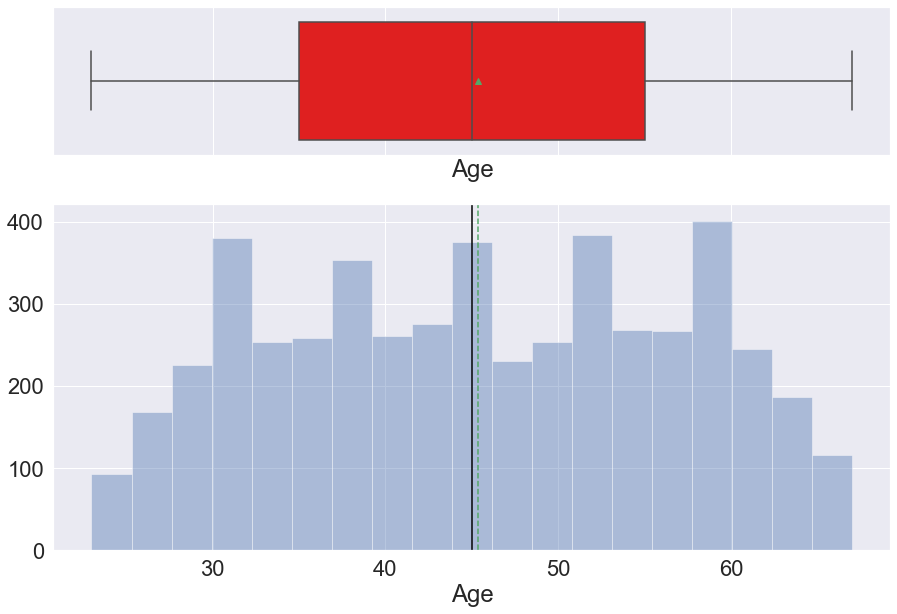

In [462]:
histogram_boxplot(bank['Age'])

The distribution of `Age` looks uniform, with not extreme values.

### Observation of `Experience`

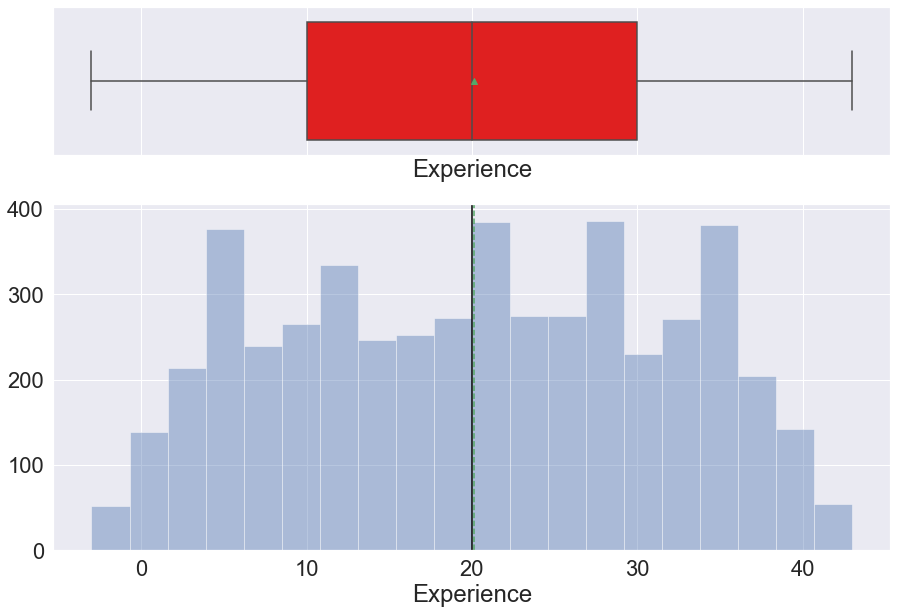

In [463]:
histogram_boxplot(bank['Experience'])

As `Age`, `Experience` looks uniformely distributed, with no outliers.

### Observation of `Income`

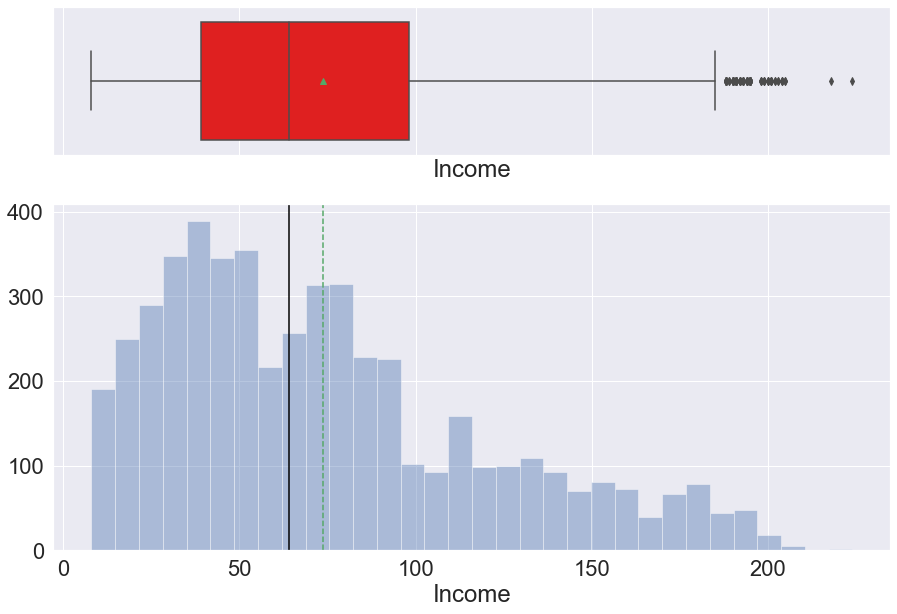

In [464]:
histogram_boxplot(bank['Income'])

`Income` is right skewed with some outliers.

### Observation of `CCAvg`

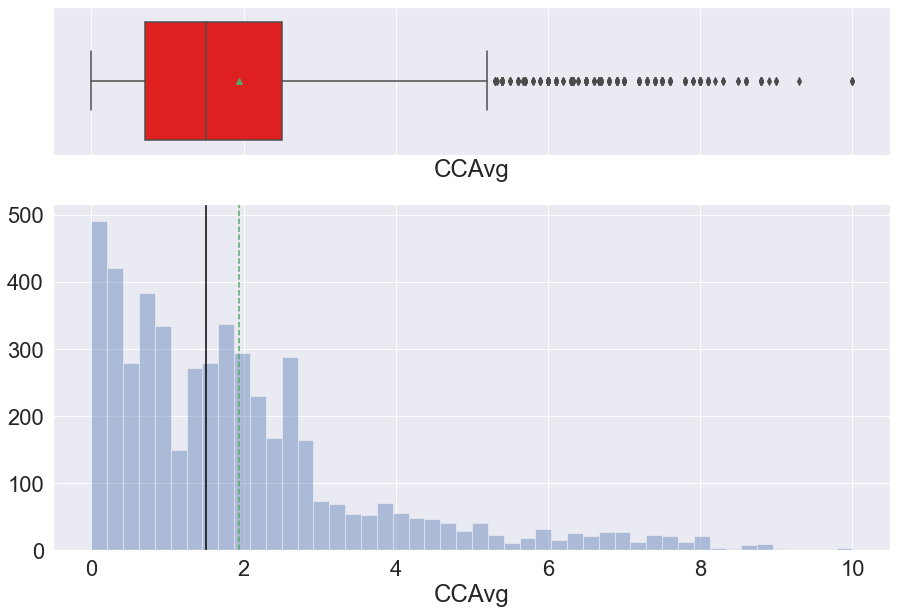

In [465]:
histogram_boxplot(bank['CCAvg'])

`CCAvg` is right skewed with outliers to the right.

### Observation of  `Mortgage`

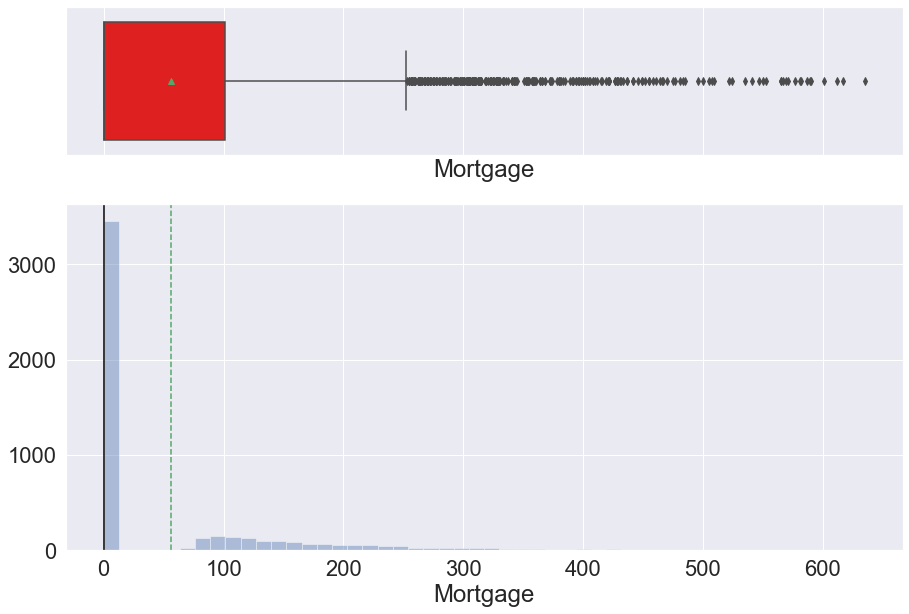

In [466]:
histogram_boxplot(bank['Mortgage'])

`Mortgage` is heavily skewed to the right and it has a lot of outliers to the right.

In [467]:
## Function to plot class-coded columns

def bar_plot(var, hue=None, figsize=(8,7), ax=None):
    
    plt.figure(figsize=figsize)
    plots=sns.countplot(var, hue=hue)
    for item in plots.patches:
        percent = f'{item.get_height()} ({item.get_height()/len(var):.1%})'
        x = item.get_x() + item.get_width()/2
        y = item.get_height()
        plots.annotate(percent, (x, y), size=12, xytext=(0, 8), va = 'center', ha = 'center', textcoords = 'offset points')
    plt.show()

### Observation of `Education`

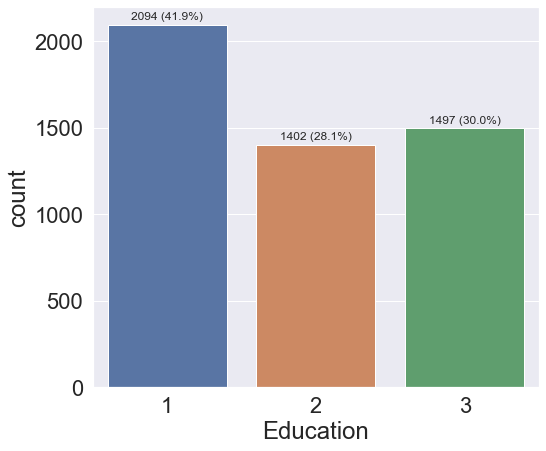

In [468]:
bar_plot(bank['Education'])

Level 2 education is the less represented with 28%, followed by Level 3 with 30%. Level 1 is the most represented with slightly more than 40% observations.

### Observation of `Family`

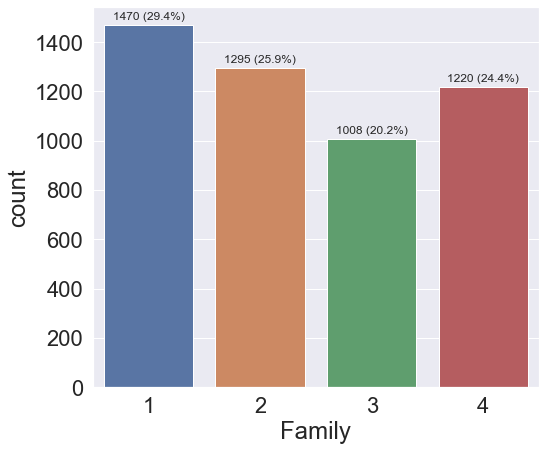

In [469]:
bar_plot(bank['Family'])

There is only a slight difference in observations between the different family sizes.

### Observation of `Securities_Account`

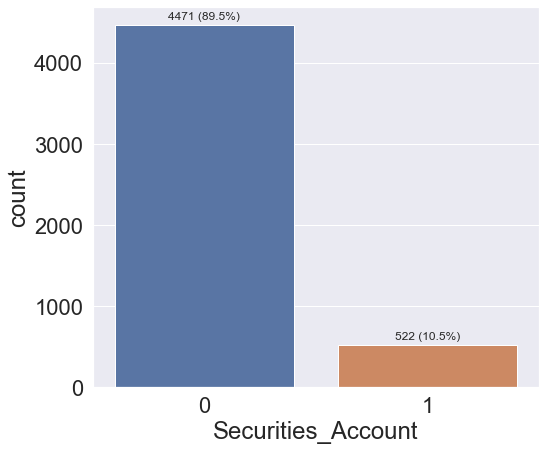

In [470]:
bar_plot(bank['Securities_Account'])

Only 10% of the observations have a securities account

### Observation of `CD_Account`

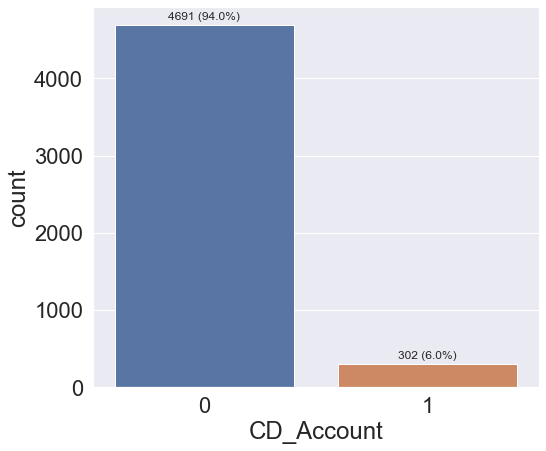

In [471]:
bar_plot(bank['CD_Account'])

Only 6% of the observations have a Certified Deposit Account

### Observation of `Online`

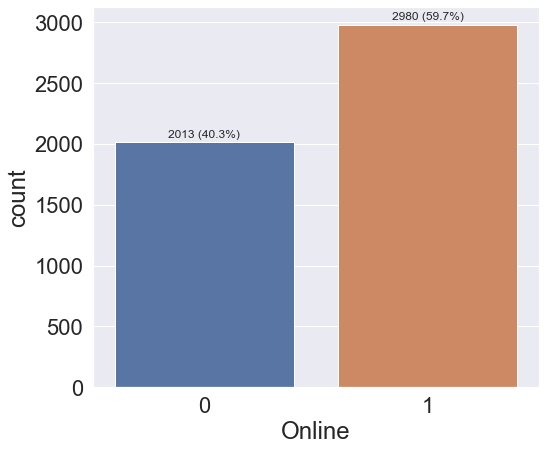

In [472]:
bar_plot(bank['Online'])

The vast majority of observations use online banking

### Observation of `CreditCard`

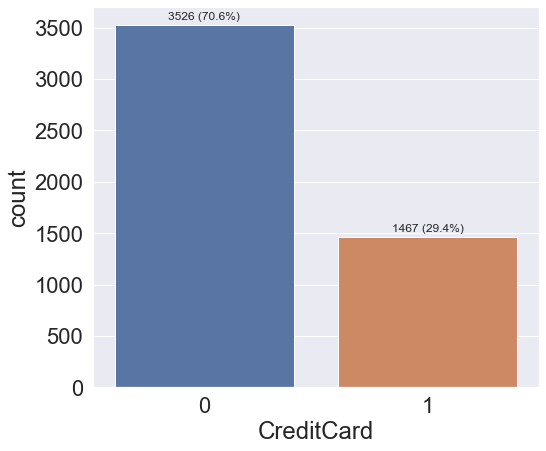

In [473]:
bar_plot(bank['CreditCard'])

About 30% of the observations use a credit card from another bank.

### Observation of `Personal_Loan`

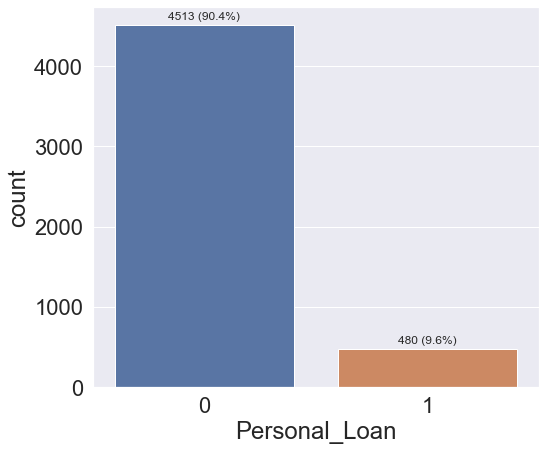

In [474]:
bar_plot(bank['Personal_Loan'])

Very few observations, less than 10%, accepted a loan offer from the bank.

## Bivariate Analysis

### Pairplot of all variables

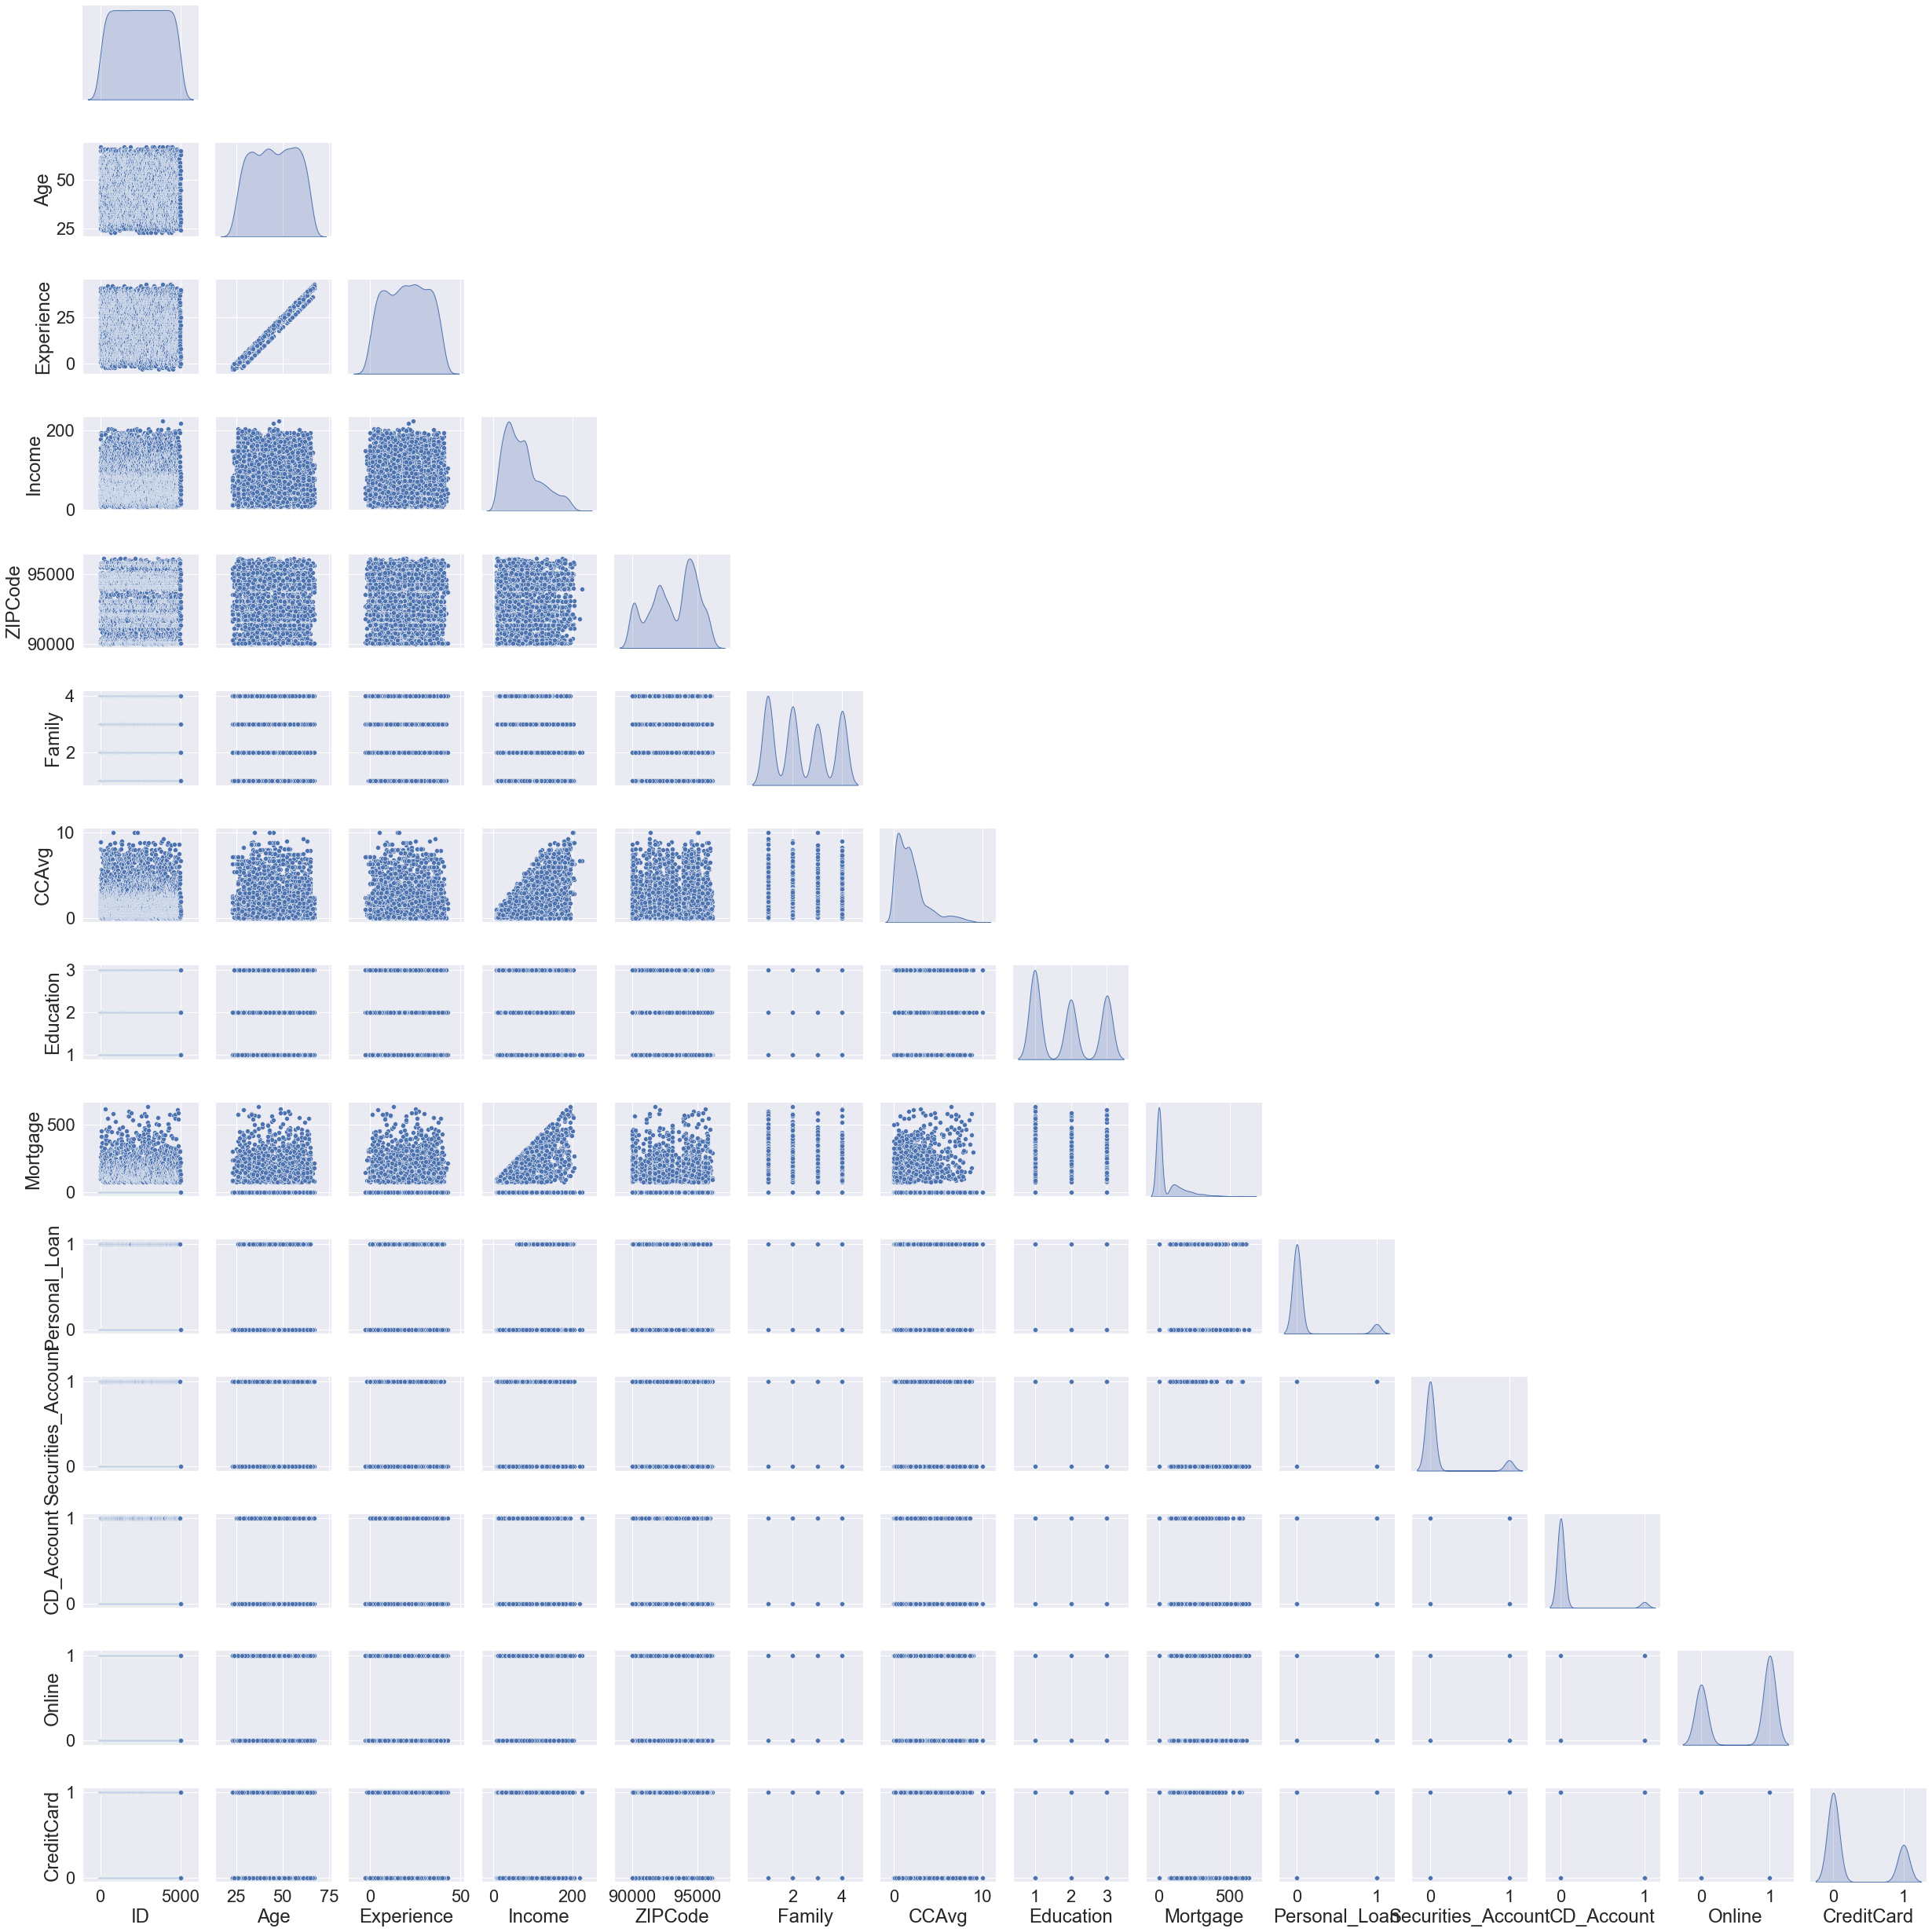

In [475]:
sns.pairplot(bank, diag_kind='kde', corner=True)

### Heatmap to visualize correlations

<AxesSubplot:>

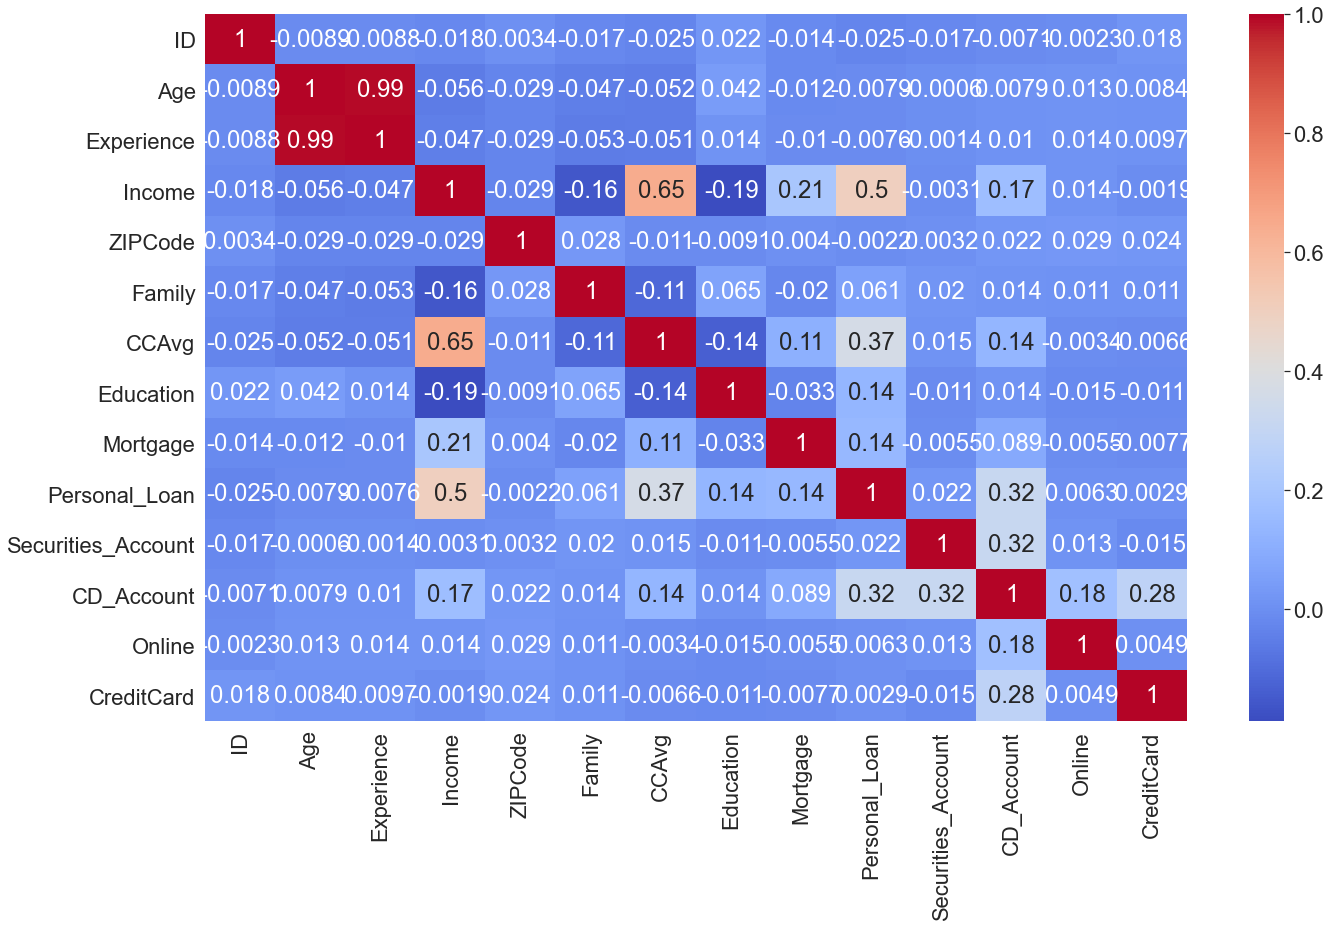

In [476]:
plt.figure(figsize=(22,13))
sns.heatmap(round(bank.corr(), 4), annot=True, cmap = 'coolwarm')

**Observations:**
- There is a strong positive correlation between `Age` and `Experience`. This makes sense as by time going, one accumulates `Experience` in his job.
- We can notice also slight correlation between `Income` and `CCavg` and between `Income` and `Personal_Loan`.
- Apart from the above mentioned, the correlations are weak.

### `Pesronal_Loan` vs `Age`

<AxesSubplot:xlabel='Age', ylabel='Personal_Loan'>

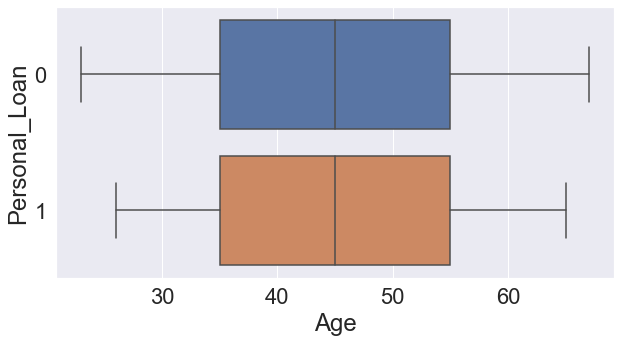

In [477]:
plt.figure(figsize=(10,5))
sns.boxplot(data=bank, y='Personal_Loan', x='Age', orient='h')

Loan acceptance is ot depending on age.

### `Personal_Loan` vs `Experience`

<AxesSubplot:xlabel='Experience', ylabel='Personal_Loan'>

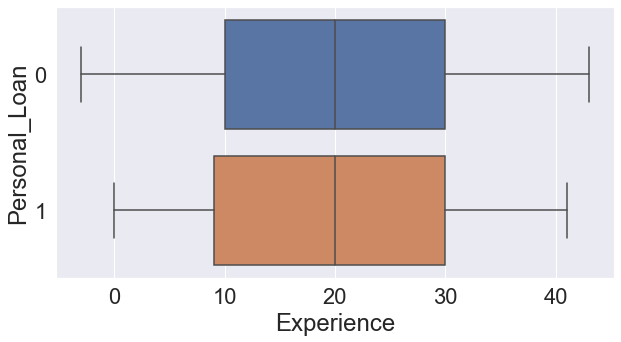

In [478]:
plt.figure(figsize=(10,5))
sns.boxplot(data=bank, y='Personal_Loan', x='Experience', orient='h')

Loan acceptance is not depending on the number of years of work experience.

### `Personal_Loan` vs `Income`

<AxesSubplot:xlabel='Income', ylabel='Personal_Loan'>

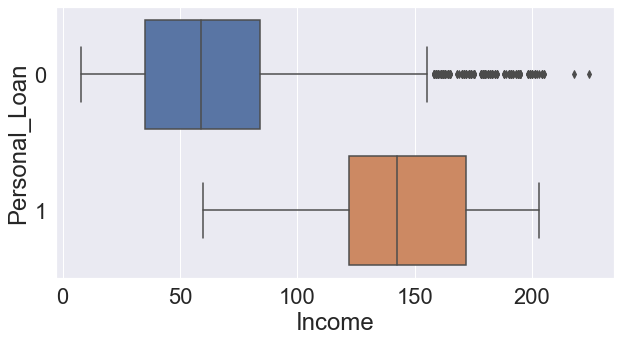

In [479]:
plt.figure(figsize=(10,5))
sns.boxplot(data=bank, y='Personal_Loan', x='Income', orient='h')

People who accepted loans have higher income. This kind of make sense since the more one earns, the more he spends and/or invest, justifying the loan.

`Personal_Loan` vs `CCAvg`

<AxesSubplot:xlabel='CCAvg', ylabel='Personal_Loan'>

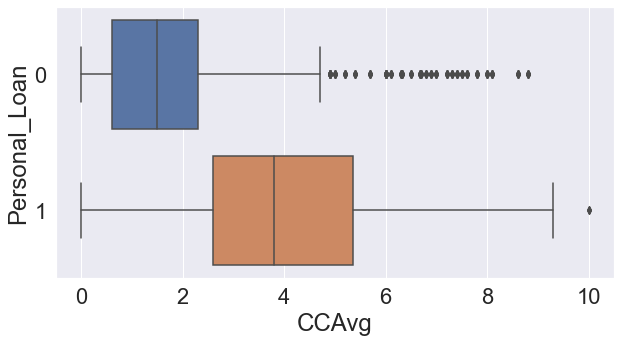

In [480]:
plt.figure(figsize=(10,5))
sns.boxplot(data=bank, y='Personal_Loan', x='CCAvg', orient='h')

- People who took the loan also have a greater comsumption of their credit card. 
- This make sense because, high credit card consumption may mean higher spending thus need of money.

### `Personal_Loan` vs `Family`

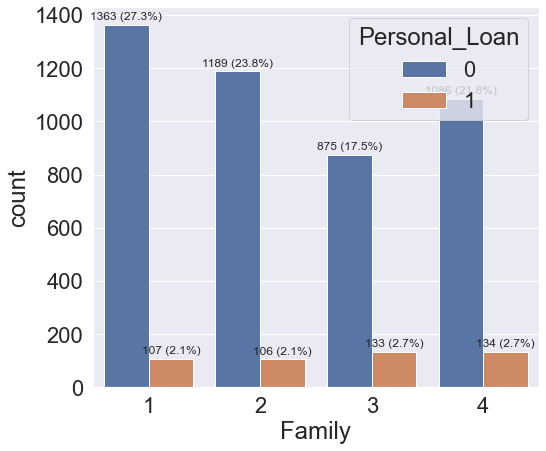

In [481]:
bar_plot(bank['Family'], hue=bank['Personal_Loan'])

The loan acceptance rate is almost the same accross different family size.

### `Personal_Loan` vs `Education`

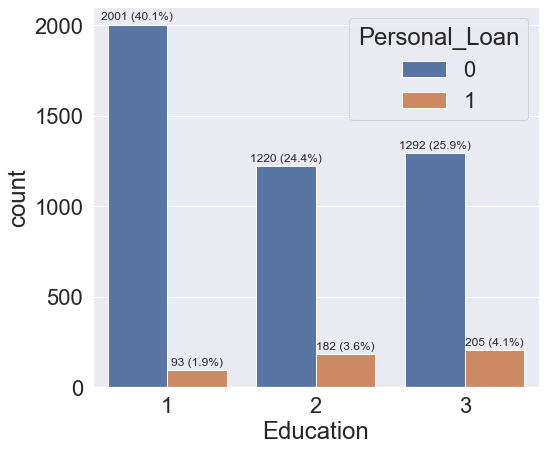

In [482]:
bar_plot(bank['Education'], hue=bank['Personal_Loan'])

The most educated people are the ones who the most accepted loans.

### `Personal_Loan` vs `Securities_Account`

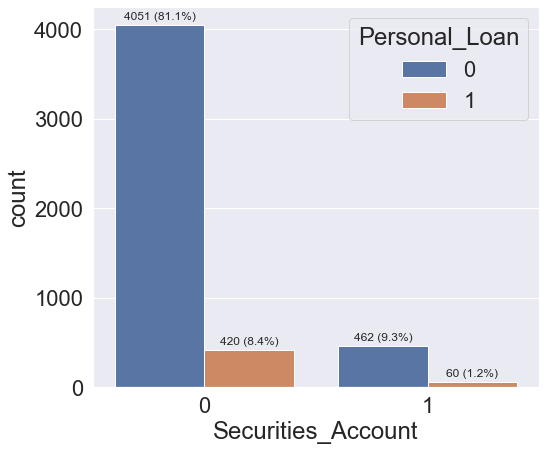

In [483]:
bar_plot(bank['Securities_Account'], hue=bank['Personal_Loan'])

About the same percentage (11%) of people with and without securities account accepted the loan

### `Persnal_Loan` vs `CD_Account`

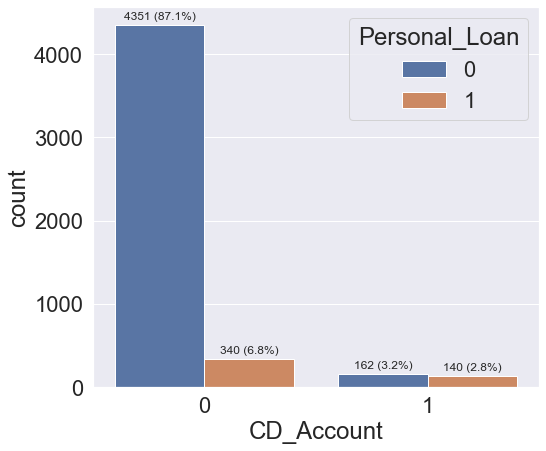

In [484]:
bar_plot(bank['CD_Account'], hue=bank['Personal_Loan'])

About 50% of people with certified deposit acccount accepted the loan versus only 7% of those without.

### `Personal_Loan` vs `Online`

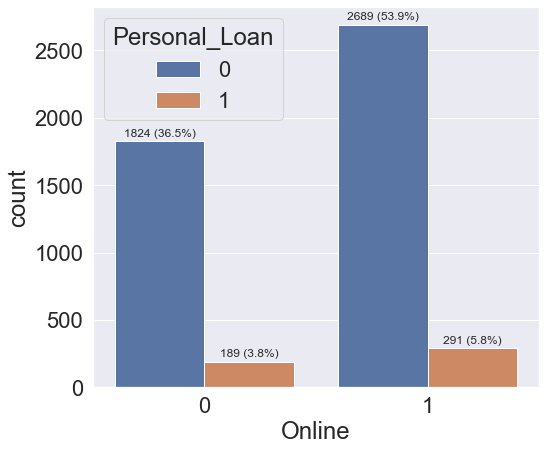

In [485]:
bar_plot(bank['Online'], hue=bank['Personal_Loan'])

Banking online or not does not affect loan acceptance.

### `Personal_Loan` vs `County`

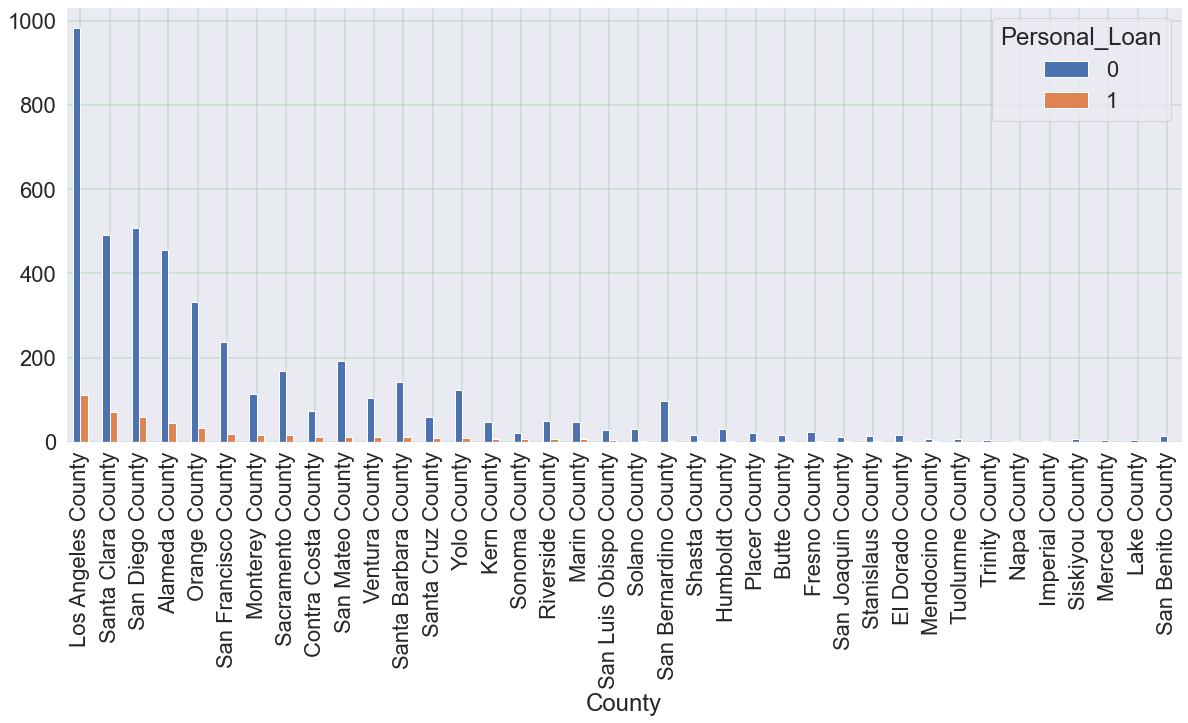

In [486]:
df = pd.crosstab(bank['County'], bank['Personal_Loan'], normalize=False).sort_values(by= 1,ascending=False)
df.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='10', color='black')
plt.show()

The counties of Los Angeles, Santa Clara, San Diego, Alameda and Orange concentrate the vast majority of customers as well as the accepted loan.

## <a name = 'link22'>2.2. Datatype fixing</a>

We have to convert `County`, `Education`, `Family`, `CreditCard`, `Online`, `CD_Account`, `Securities_Account`, `Personal_Loan` into categories.

In [487]:
cols = ['County', 'Education', 'Family', 'CreditCard', 'Online', 'CD_Account', 'Securities_Account', 'Personal_Loan']
bank[cols] = bank[cols].astype('category')

In [488]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4993 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  4993 non-null   int64   
 1   Age                 4993 non-null   int64   
 2   Experience          4993 non-null   int64   
 3   Income              4993 non-null   int64   
 4   ZIPCode             4993 non-null   int64   
 5   Family              4993 non-null   category
 6   CCAvg               4993 non-null   float64 
 7   Education           4993 non-null   category
 8   Mortgage            4993 non-null   int64   
 9   Personal_Loan       4993 non-null   category
 10  Securities_Account  4993 non-null   category
 11  CD_Account          4993 non-null   category
 12  Online              4993 non-null   category
 13  CreditCard          4993 non-null   category
 14  County              4993 non-null   category
dtypes: category(8), float64(1), int64(6)
m

## <a name = 'link23'>2.3. Outliers treatment</a>

- We previously notice that there are some abnormal negative values in `Experience`. We are going to drop those.
- Box plots flag some observations as outliers in `Income`, `Mortgage` and `CCAvg`. We think however that, this is due to the wide range those values can take and also, they depend on personal financial status and choices. The values in the dataset remain valid is our point of view. But for the sake of completeness, we will make the analysis both with the values flooored and capped and without to see if there is any difference.  

In [489]:
# Let's make a copy of our dataset where we will keep data as they are.

bank_raw = bank.copy()

In [490]:
# Let's treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: bankframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: bank frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [491]:
#Now we apply the above defined function to cap and floor 'extreme values'

bank = treat_outliers_all(bank, ['Income', 'Mortgage', 'CCAvg'])

In [492]:
bank.describe().T

count        mean        std         min         25%  \
ID         4993.00000  2501.79692 1443.54037     1.00000  1252.00000   
Age        4993.00000    45.34488   11.46125    23.00000    35.00000   
Experience 4993.00000    20.11076   11.46628    -3.00000    10.00000   
Income     4993.00000    73.67975   45.62465     8.00000    39.00000   
ZIPCode    4993.00000 93165.09153 1756.54026 90005.00000 91911.00000   
CCAvg      4993.00000     1.83298    1.45250     0.00000     0.70000   
Mortgage   4993.00000    50.51923   83.03787     0.00000     0.00000   

                   50%         75%         max  
ID          2502.00000  3752.00000  5000.00000  
Age           45.00000    55.00000    67.00000  
Experience    20.00000    30.00000    43.00000  
Income        64.00000    98.00000   186.50000  
ZIPCode    93407.00000 94608.00000 96150.00000  
CCAvg          1.50000     2.50000     5.20000  
Mortgage       0.00000   101.00000   252.50000

In [493]:
# Let's drop observations with negative values in Experience and making restauration copies

bank = bank[~bank.Experience < 0]
bank_raw = bank_raw[~bank_raw.Experience < 0]

## <a name='link23'>2.3. Features engineering</a>

In this section, we will just do a couple of things:
- Droppring `ID` and `ZIPCode` as they are not relevant.
- Transform `County` into dummies

In [494]:
# Drop ID and ZIPCode and Make a restauration copy to avoid running the whole notebook every time

data = bank.drop(columns=['ID', 'ZIPCode'])
data_raw = bank_raw.drop(columns=['ID', 'ZIPCode'])

In [495]:
## Copy to use from now on

Bank = data.copy()
Bank_raw = data_raw.copy()

In [496]:
Bank =  pd.get_dummies(Bank, columns = ['County', 'Education', 'Family'], drop_first=False)
Bank_raw =  pd.get_dummies(Bank_raw, columns = ['County', 'Education', 'Family'], drop_first=False)

# <a name = 'link3'>3. Modeling</a>

## <a name = 'link31'>3.1. Data preparation for modeling</a>

In [497]:
# Defining target and predicting variables

y = Bank[['Personal_Loan']]

X, X_raw = Bank.drop(columns=['Personal_Loan']), Bank_raw.drop(columns=['Personal_Loan'])

In [498]:
# Splitting data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.3, random_state=1)

X_raw_train, X_raw_test, y_train, y_test = train_test_split(X_raw, y, test_size=.3, random_state=1)
train_X_raw, test_X_raw, train_y, test_y = train_test_split(X_raw, y, test_size=.3, random_state=1)

## <a name = 'link32'>3.2. Logistic Regression</a>

### <a name = 'link321'>3.2.1. Preliminaries</a>

### Model performance criterion

Since the bank is concerned about targetting potential loan buyers, the model should accurately predict them. That is, the model should label the maximum of potential buyers as such. So `recall` is the most important measure here. Of course, minimising the error by wrongly labelling as potential loan buyer someone who is not will help the bank saving a little bit on advertising.

### Some useful tools

- The following functions will help us calculate the differents metrics and build the confusion matrices.
- The function `get_metrics_score1` will be sued for models built with sklearn and the function `get_metrics_score2` for models built using statsmodels library.
- **Note:** All these functions were borrowed from our course materials.

In [499]:
def get_metrics_score1(model,train,test,train_y,test_y,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    flag: If the flag is set to True then only the print statements shwoing different will be displayed. 
    The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",round(accuracy_score(pred_train,train_y), 3))
        print("Accuracy on test set : ",round(accuracy_score(pred_test,test_y), 3))
        print("Recall on training set : ",round(recall_score(train_y,pred_train), 3))
        print("Recall on test set : ",round(recall_score(test_y,pred_test), 3))
        print("Precision on training set : ",round(precision_score(train_y,pred_train), 3))
        print("Precision on test set : ",round(precision_score(test_y,pred_test), 3))
        print("F1 on training set : ",round(f1_score(train_y,pred_train), 3))
        print("F1 on test set : ",round(f1_score(test_y,pred_test), 3))
        
    if roc == True:
        print("ROC-AUC Score on training set : ",round(roc_auc_score(train_y,pred_train), 3))
        print("ROC-AUC Score on test set : ",round(roc_auc_score(test_y,pred_test), 3))
    
    return score_list # returning the list with train and test scores

In [500]:
def get_metrics_score2(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. 
    The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict(train)>threshold)
    pred_test = (model.predict(test)>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",round(accuracy_score(pred_train,train_y), 3))
        print("Accuracy on test set : ",round(accuracy_score(pred_test,test_y), 3))
        print("Recall on training set : ",round(recall_score(train_y,pred_train), 3))
        print("Recall on test set : ",round(recall_score(test_y,pred_test), 3))
        print("Precision on training set : ",round(precision_score(train_y,pred_train), 3))
        print("Precision on test set : ",round(precision_score(test_y,pred_test), 3))
        print("F1 on training set : ",round(f1_score(train_y,pred_train), 3))
        print("F1 on test set : ",round(f1_score(test_y,pred_test), 3))
        
    if roc == True:
        print("ROC-AUC Score on training set : ",round(roc_auc_score(train_y,pred_train), 3))
        print("ROC-AUC Score on test set : ",round(roc_auc_score(test_y,pred_test), 3))
    
    return score_list # returning the list with train and test scores

In [501]:
## Function to create confusion matrix
def make_confusion_matrix(model,test_X, y_actual, threshold = 0.5, labels=[0, 1], color=None):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)> threshold
    cm=metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,8))
    sns.heatmap(df_cm, annot=labels,fmt='', cmap = color)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### <a name = 'link322'>3.2.2. Logistic Regression using sklearn</a>

In [502]:
model = LogisticRegression(solver='liblinear', random_state=1)
model_raw = LogisticRegression(solver='liblinear', random_state=1)

In [503]:
model.fit(X_train, y_train)
model_raw.fit(X_raw_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [504]:
# Scores with model

Score = get_metrics_score1(model, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.965
Accuracy on test set :  0.964
Recall on training set :  0.727
Recall on test set :  0.672
Precision on training set :  0.915
Precision on test set :  0.866
F1 on training set :  0.81
F1 on test set :  0.757


The model does overall good.

In [505]:
# Scores with model tested with raw data

Score_ = get_metrics_score1(model, X_train, X_raw_test, y_train, y_test)

Accuracy on training set :  0.965
Accuracy on test set :  0.96
Recall on training set :  0.727
Recall on test set :  0.68
Precision on training set :  0.915
Precision on test set :  0.81
F1 on training set :  0.81
F1 on test set :  0.739


Testing the model on raw data (data that were no treated for outliers except abnormal values) does slightly less but still an overall good performance.

In [506]:
# Scores with model_raw

Score_raw = get_metrics_score1(model_raw, X_raw_train, X_raw_test, y_train, y_test)

Accuracy on training set :  0.961
Accuracy on test set :  0.96
Recall on training set :  0.707
Recall on test set :  0.632
Precision on training set :  0.89
Precision on test set :  0.849
F1 on training set :  0.788
F1 on test set :  0.725


Model with actual data does slightly better on `Precision` but less in other metrics.

Before validating the results, some verifications have to be made that we can not do with sklearn, but with statsmodels

### <a name = 'link323'>3.2.3. Logistic Regression using statsmodels</a>

In [507]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_raw_train = sm.add_constant(X_raw_train)
X_raw_test = sm.add_constant(X_raw_test)

In [508]:
logit = sm.Logit(y_train, X_train)
lg = logit.fit(warn_convergence =False)


         Current function value: 0.097886
         Iterations: 35


In [509]:
# Making the list of counties' attributes to help drop when checking for multicolinearity
countie = data['County'].unique()
counties = ['County_' + county for county in countie]

### Check for Multicolinearity

In [510]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])], index=X_train.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                            0.00000
Age                             94.45011
Experience                      94.19949
Income                           1.89035
CCAvg                            1.75985
Mortgage                         1.03458
Securities_Account               1.14286
CD_Account                       1.33827
Online                           1.05466
CreditCard                       1.13213
County_Alameda County                inf
County_Butte County                  inf
County_Contra Costa County           inf
County_El Dorado County              inf
County_Fresno County                 inf
County_Humboldt County               inf
County_Imperial County               inf
County_Kern County                   inf
County_Lake County                   inf
County_Los Angeles County            inf
County_Marin County                  inf
County_Mendocino County              inf
County_Merced County                 inf
County_Monterey County               inf
Co

There is high multicolinearity among our variable which we treat using `variance inflation factor`.

In [511]:
X_train1 = X_train.drop(columns=['Experience', counties[0], 'Education_1', 'Family_1'])
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])], index=X_train1.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series1))

VIF Scores: 

const                           32.23980
Age                              1.02399
Income                           1.88366
CCAvg                            1.75235
Mortgage                         1.03458
Securities_Account               1.14160
CD_Account                       1.33671
Online                           1.05465
CreditCard                       1.13199
County_Alameda County            1.32256
County_Butte County              1.01569
County_Contra Costa County       1.06851
County_El Dorado County          1.01487
County_Fresno County             1.02064
County_Humboldt County           1.02711
County_Imperial County           1.00361
County_Kern County               1.03944
County_Lake County               1.00933
County_Marin County              1.04623
County_Mendocino County          1.01130
County_Merced County             1.00538
County_Monterey County           1.09963
County_Napa County               1.00698
County_Orange County             1.24373
Co

Our data have been treated from multicolinearity. All  the variance inflation factors are now less than 5.

In [512]:
logit1 = sm.Logit(y_train, X_train1)
lg1 = logit1.fit(warn_convergence =False)

         Current function value: 0.098476
         Iterations: 35


In [513]:
lg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3458
Model:                          Logit   Df Residuals:                     3407
Method:                           MLE   Df Model:                           50
Date:                Wed, 16 Jun 2021   Pseudo R-squ.:                  0.7024
Time:                        08:50:43   Log-Likelihood:                -340.53
converged:                      False   LL-Null:                       -1144.2
Covariance Type:            nonrobust   LLR p-value:                8.053e-304
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -15.1106      0.988    -15.287      0.000     -17.048     -13.173
Age                              -0.0053      0.009     -0.574      0.566      -0.023       0.013
Income                            0.0719      0.005     15.633      0.000       0.063       0.081
CCAvg                             0.5030      0.084      5.970      0.000       0.338       0.668
Mortgage                          0.0011      0.001      1.004      0.315      -0.001       0.003
Securities_Account               -0.5969      0.397     -1.502      0.133      -1.376       0.182
CD_Account                        3.8206      0.460      8.305      0.000       2.919       4.722
Online                           -0.8821      0.217     -4.072      0.000      -1.307      -0.458
CreditCard                       -0.8962      0.280     -3.198      0.001      -1.446      -0.347
County_Alameda County            -0.2181      0.390     -0.560      0.576      -0.982       0.545
County_Butte County               2.0307      1.205      1.686      0.092      -0.330       4.392
County_Contra Costa County       -0.3999      0.909     -0.440      0.660      -2.181       1.381
County_El Dorado County          -0.5102      1.655     -0.308      0.758      -3.753       2.733
County_Fresno County             -1.4795      1.848     -0.800      0.423      -5.102       2.143
County_Humboldt County           -1.3986      1.836     -0.762      0.446      -4.996       2.199
County_Imperial County          -14.9948   3.72e+04     -0.000      1.000    -7.3e+04     7.3e+04
County_Kern County                0.6242      0.858      0.728      0.467      -1.057       2.306
County_Lake County              -15.0308   1.65e+04     -0.001      0.999   -3.24e+04    3.24e+04
County_Marin County               0.6141      0.826      0.744      0.457      -1.004       2.233
County_Mendocino County          -2.8409      6.298     -0.451      0.652     -15.185       9.503
County_Merced County            -16.8865   1.78e+04     -0.001      0.999   -3.48e+04    3.48e+04
County_Monterey County           -0.1494      0.602     -0.248      0.804      -1.330       1.031
County_Napa County              -10.5113   3276.347     -0.003      0.997   -6432.033    6411.010
County_Orange County             -0.2197      0.435     -0.505      0.613      -1.072       0.633
County_Placer County             -0.1693      1.252     -0.135      0.892      -2.624       2.285
County_Riverside County          -1.1985      1.580     -0.758      0.448      -4.296       1.899
County_Sacramento County         -0.6549      0.713     -0.919      0.358      -2.052       0.742
County_San Benito County        -15.3721   6627.862     -0.002      0.998    -1.3e+04     1.3e+04
County_San Bernardino County     -0.4837      0.725     -0.667      0.505      -1.905       0.938
County_San Diego County           0.0866      0.369      0.235      0.814      -0.636       0.810
County_

- All attributes of `County` have high p-value, meanig `County` is not a signiicant variable to predict if a customer will buy a loan. We will just drop the variable `County` before proceeding.

In [514]:
X_test1 = X_test.drop(columns=['Experience', counties[0], 'Family_1', 'Education_1'])

In [515]:
lg1_scores = get_metrics_score2(lg1, X_train1, X_test1, y_train, y_test)

Accuracy on training set :  0.967
Accuracy on test set :  0.962
Recall on training set :  0.755
Recall on test set :  0.68
Precision on training set :  0.905
Precision on test set :  0.842
F1 on training set :  0.823
F1 on test set :  0.752


In [516]:
# Dropping all the attributes of County

X_train2 = X_train1.drop(columns = [county for county in counties if county != counties[0]])
X_test2 = X_test1.drop(columns = [county for county in counties if county != counties[0]])

In [517]:
logit2 = sm.Logit(y_train, X_train2)
lg2 = logit2.fit(warn_convergence =False)

Optimization terminated successfully.
         Current function value: 0.102609
         Iterations 10


In [518]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3458
Model:                          Logit   Df Residuals:                     3444
Method:                           MLE   Df Model:                           13
Date:                Wed, 16 Jun 2021   Pseudo R-squ.:                  0.6899
Time:                        08:50:43   Log-Likelihood:                -354.82
converged:                       True   LL-Null:                       -1144.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -14.6377      0.914    -16.014      0.000     -16.429     -12.846
Age                   -0.0053      0.009     -0.599      0.549      -0.022       0.012
Income              

**Interpretation:**
- `Income` significantly influences the chance of an individual to buy a loan from the bank. An increase in income increase the probability of a customer to buy a loan.
- The increase of `CCAvg` also imcrease the chance to buy a loan. This makes sense for consuming more of the credit line may be a sign of limited iving means.
- `Online` bankers are not good potential loan buyers.
- The more someone is educated, the more chances he has to buy a loan.
- `Family` size influences loan purchasing. A customer with a family size of three people has more chances to purchase a loan than a customer with a family size of one.
- `Mortgage` amount, `Age`, possession of `Securities_Account` are not significant predictors of loan purchasing.
Possession of `CreditCard` from another bank lowers the probability to buy a loan from the bank.

In [519]:
lg2_scores = get_metrics_score2(lg2, X_train2, X_test2, y_train, y_test, roc=True)

Accuracy on training set :  0.966
Accuracy on test set :  0.968
Recall on training set :  0.749
Recall on test set :  0.688
Precision on training set :  0.902
Precision on test set :  0.915
F1 on training set :  0.818
F1 on test set :  0.785
ROC-AUC Score on training set :  0.87
ROC-AUC Score on test set :  0.841


`lg2` improves a little bit on all the scores. This is the model we keep.

## ROC-AUC

### ROC-AUC on training data

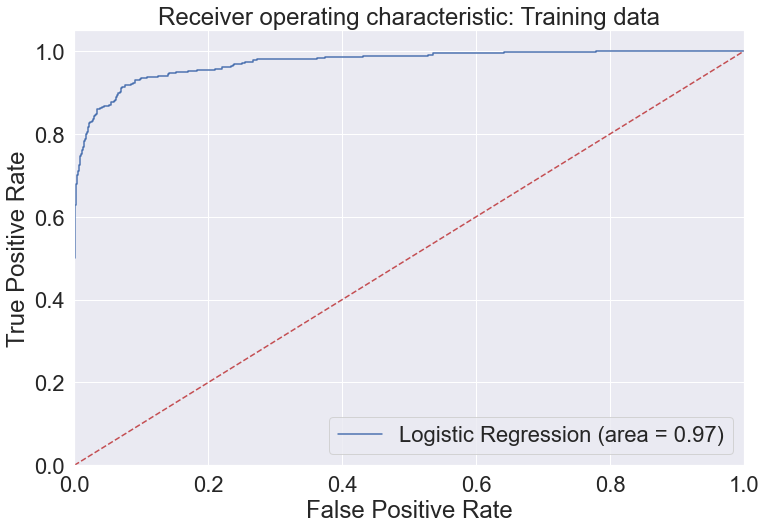

In [520]:
plt.figure(figsize = (12, 8))
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Training data')
plt.legend(loc="lower right")
plt.show()

### ROC -AUC on test data

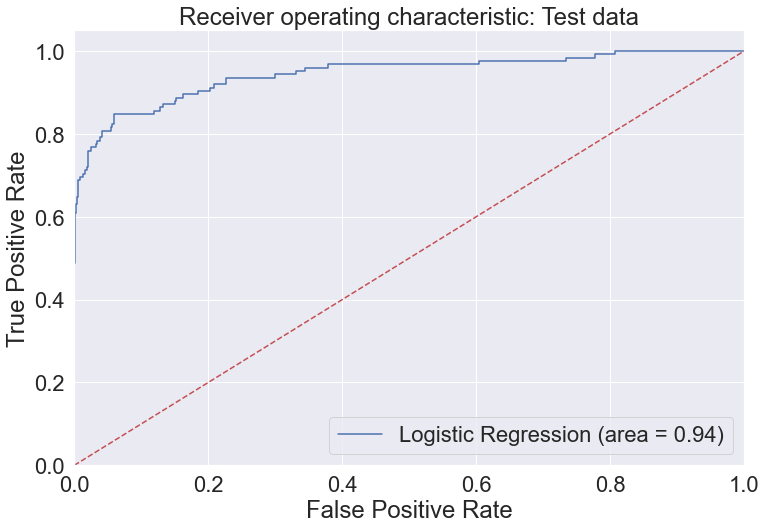

In [521]:
plt.figure(figsize = (12, 8))
logit_roc_auc_test = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Test data')
plt.legend(loc="lower right")
plt.show()

- Our model is having a good performance in both training and test data.

## Model improvement

We now try to see if yhe performance of our model `lg4` can be improved. We will try it through two techniques:
- Looking for a better threshold, if any, using the ROC-AUC curve
- Looking for a better threshold , if any, using the Precision-Recall curve.

### Using ROC-AUC curve to look  for a better threshold

In [522]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg2.predict(X_test2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.13576069011006991


In [523]:
lg2_scores_opt1 = get_metrics_score2(lg2 ,X_train2, X_test2, y_train, y_test, threshold=optimal_threshold_auc_roc, roc=True)

Accuracy on training set :  0.931
Accuracy on test set :  0.932
Recall on training set :  0.899
Recall on test set :  0.84
Precision on training set :  0.61
Precision on test set :  0.565
F1 on training set :  0.727
F1 on test set :  0.675
ROC-AUC Score on training set :  0.916
ROC-AUC Score on test set :  0.89


**Observations:**
- Apart from `Recall` that have improved in both training and test data, all the other metrics, including `AUC` have substantially dropped.
- The improvement in `Recall` is due to the low threshold (.135) which is not a good one for prediction.

### Using Precision-Recall curve to look for better threshold

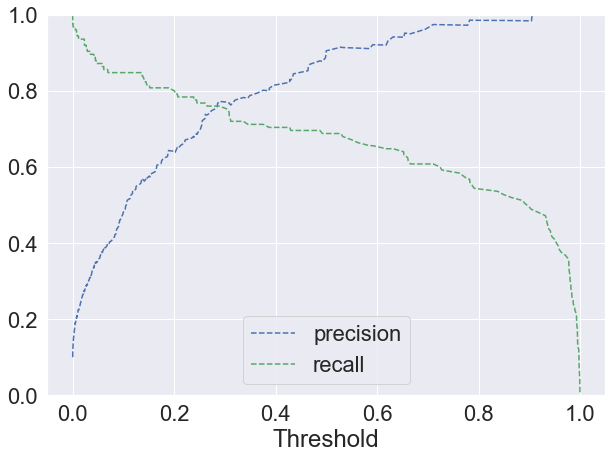

In [524]:
y_scores=lg2.predict(X_test2)
prec, rec, tre = precision_recall_curve(y_test, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='lower center')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- We get balanced `Recall` and `Precision` at a threshold of about .28, which is again too low.

In [525]:
# Let's see the scores for that threshold

lg2_scores_opt2 = get_metrics_score2(lg2 ,X_train2, X_test2, y_train, y_test, threshold=0.28, roc=True)

Accuracy on training set :  0.957
Accuracy on test set :  0.959
Recall on training set :  0.842
Recall on test set :  0.76
Precision on training set :  0.761
Precision on test set :  0.754
F1 on training set :  0.799
F1 on test set :  0.757
ROC-AUC Score on training set :  0.906
ROC-AUC Score on test set :  0.869


- Here as well, apart from `Recall` the other metrics are lower than with a threshold of 0.5
- For good prediction, we keep the threshold of 0.5

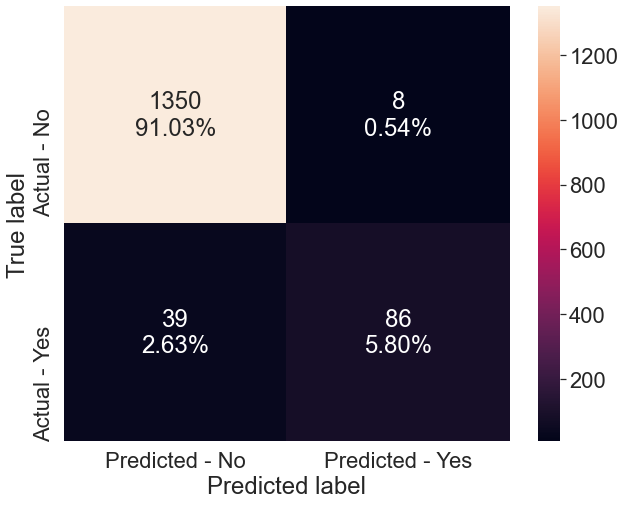

In [526]:
make_confusion_matrix(lg2, X_test2, y_test)

## Analysing of mispredicted data

Let's write a function to retrieve wrongly predicted data.

In [527]:
def LR_mislabelled_data(df, model, X, y, threshold =0.5):
    '''
    Function to retrieve wrongly labeled observations.
    Parameters:
        model: The model that made the prediction
        df: The dataset being used for modeling
        X : Array of predictors
        y: Target variable
        
    The function stores the indexes of mislabeld observations and then use those indexes 
    to filter the dataset for the mislabeled observations.
    Returns dataframe of all the mislabeled, falsely positive labeled and falsely negative labeled observations respectively.
    '''
    
    idx_mispred = []
    idx_mispred_true = []
    idx_mispred_false = []
    y_pred = model.predict(X)
    for i in range(len(y)):
        if y_pred.iloc[i]>threshold and y.iloc[i].values==0:
            idx = y.index[i]
            idx_mispred_true.append(idx)
            idx_mispred.append(idx)
        elif y_pred.iloc[i]<threshold and y.iloc[i].values==1:
            idx = y.index[i]
            idx_mispred_false.append(idx)
            idx_mispred.append(idx)
    mispred_obs = df.loc[idx_mispred]
    mispred_true = df.loc[idx_mispred_true]
    mispred_false = df.loc[idx_mispred_false]
    return mispred_obs, mispred_true, mispred_false

In [528]:
LR_wrongpred, LR_wrongpredict_true, LR_wrongpredict_false = LR_mislabelled_data(data_raw, lg2, X_test2, y_test)

In [529]:
#Visual check of false positive data

LR_wrongpredict_true

Age  Experience  Income Family   CCAvg Education  Mortgage  \
3357   32           6     112      1 2.70000         2       408   
1432   26           2     195      1 6.33000         1         0   
740    52          27     195      1 8.10000         1         0   
4671   39          14     104      1 4.00000         3         0   
785    46          22     164      2 7.60000         1         0   
932    51          27     112      3 1.80000         2         0   
1354   35          10     179      1 8.60000         1       357   
679    55          31     103      3 1.80000         2       364   

     Personal_Loan Securities_Account CD_Account Online CreditCard  \
3357             0                  1          1      1          1   
1432             0                  0          0      0          0   
740              0                  0          0      0          0   
4671             0                  0          1      1          1   
785              0                  0          1      1          1   
932              0                  1          1      1          1   
1354             0                  0          0      0          0   
679              0                  0          0      0          0   

                    County  
3357  San Francisco County  
1432    Los Angeles County  
740     Los Angeles County  
4671    Santa Clara County  
785   San Francisco County  
932         Alameda County  
1354      San Diego County  
679       San Diego County

In [530]:
# Visual of false Negative data

LR_wrongpredict_false

Age  Experience  Income Family   CCAvg Education  Mortgage  \
3541   45          20     144      4 5.40000         1       210   
813    50          25     130      1 1.10000         2         0   
4418   59          34     145      4 1.80000         1       198   
3217   65          39      94      4 4.10000         1       120   
4604   32           7      81      2 3.40000         2         0   
57     56          31     131      2 1.20000         3         0   
2159   61          35      99      1 4.80000         3       255   
1731   43          19     125      3 2.40000         1         0   
765    47          21     109      4 1.80000         1         0   
317    40          16     119      2 4.20000         2         0   
1577   34           8      65      1 3.00000         1       227   
4583   52          26      83      1 3.10000         1         0   
3343   62          37     125      1 1.00000         3         0   
2623   42          17     111      3 3.00000         1         0   
2885   57          31     113      4 0.60000         3       327   
4301   49          24     130      4 1.10000         1       281   
1407   63          39     101      2 3.90000         3       294   
1069   44          18      75      2 3.50000         1         0   
4702   35           5     108      2 2.75000         3         0   
951    59          34      83      2 3.40000         3         0   
2968   44          18     162      4 1.30000         1       301   
2533   54          29     111      1 1.10000         2         0   
1674   37          11     139      2 0.80000         2       421   
3271   52          27      93      4 4.10000         2         0   
2403   38          13     140      4 0.50000         1         0   
3318   46          20     105      4 3.20000         1         0   
1176   29           3     103      4 3.40000         1         0   
2996   42          18     103      1 3.33000         1         0   
1372   39          13     139      3 3.40000         1       483   
442    58          28     122      1 3.00000         3       115   
2345   65          40      89      1 4.10000         1       299   
3992   47          22      95      2 3.90000         2         0   
4302   52          27      85      3 3.40000         3         0   
1062   47          21      83      1 3.80000         1        97   
1889   56          30     111      4 0.30000         1       372   
1478   65          39     160      4 3.80000         1       237   
3288   56          30     140      4 0.50000         1       292   
2772   55          31     130      4 6.50000         1         0   
4124   53          29     141      2 0.20000         3         0   

     Personal_Loan Securities_Account CD_Account Online CreditCard  \
3541             1                  0          0      1          0   
813              1                  0          0      1          0   
4418             1                  0          0      1          0   
3217             1                  0          1      1          1   
4604             1                  0          0      0          1   
57               1                  0          0      0          0   
2159             1                  0          0      0          1   
1731             1                  0          0      1          0   
765              1                  0          0      0          0   
317              1                  0          0      1          0   
1577             1                  0          0      1          0   
4583             1                  0          0      1          0   
3343             1                  0          0      1          0   
2623             1                  1          1      0          1   
2885             1                  0          0      1          0   
4301             1                  0          1      1          0   
1407             1                  0          0      1          0   
1069             1       

**Notes:**
- Wrongly labelled positive data have higher value of `Income`. Mean `Income` of these data is **145.5** which is above the third percentile of the overall dataset. That is consistent with the model prediction for which high `Income` means higher probability to purchase a loan.
- The same holds true for `CCAVg` which mean on false positive of **5.11** is well above the third percentile of the whole dataset of **2.6*.

<AxesSubplot:xlabel='Income', ylabel='Personal_Loan'>

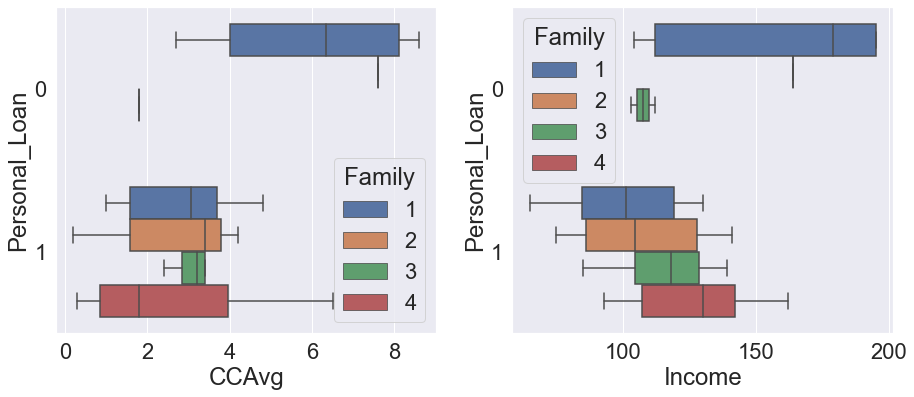

In [531]:
f, ax =plt.subplots(1, 2, figsize = (15, 6))
sns.boxplot(data=LR_wrongpred, x = 'CCAvg', y='Personal_Loan', orient='h', hue='Family', ax=ax[0])
sns.boxplot(data=LR_wrongpred, x = 'Income', y='Personal_Loan', orient='h', hue='Family', ax=ax[1])

<AxesSubplot:xlabel='Income', ylabel='Personal_Loan'>

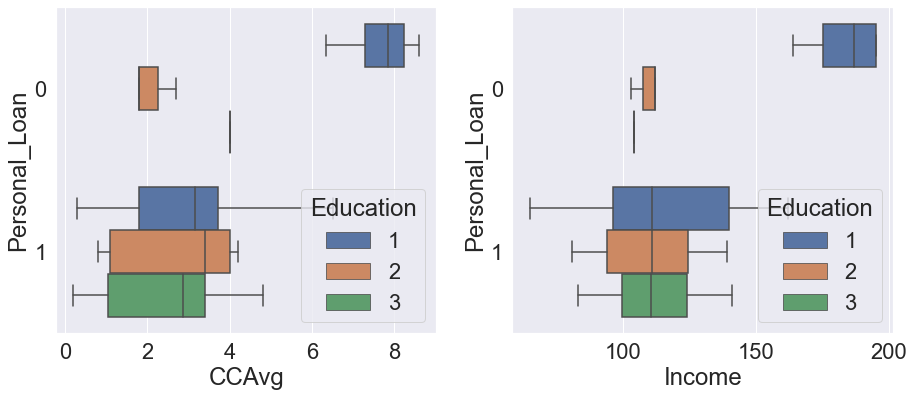

In [532]:
f, ax =plt.subplots(1, 2, figsize = (15, 6))
sns.boxplot(data=LR_wrongpred, x = 'CCAvg', y='Personal_Loan', orient='h', hue='Education', ax=ax[0])
sns.boxplot(data=LR_wrongpred, x = 'Income', y='Personal_Loan', orient='h', hue='Education', ax=ax[1])

**Observations:**
- Customers that were mislabeled as not having accepted the loan have midlevel credit consumption and pretty high level income.

## <a name = 'link33'>3.3 Decision Tree</a>

### <a name = 'link331'>3.3.1 Split the data</a>

In [533]:
bank_dt = data_raw.copy()

In [534]:
Xdt, ydt = bank_dt.drop(columns= ('Personal_Loan')), bank_dt[['Personal_Loan']]
Xdt = pd.get_dummies(X, drop_first = False)

Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(X, y, test_size = .3, random_state = 1)

### <a name = 'link332'>3.3.2 Building the Decision Tree model</a>

In [535]:
modelTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
modelTree.fit(Xdt_train, ydt_train)

DecisionTreeClassifier(random_state=1)

### Getting the scores of the Tree

In [536]:
dTree_scores = get_metrics_score2(modelTree, Xdt_train, Xdt_test, ydt_train, ydt_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.978
Recall on training set :  1.0
Recall on test set :  0.872
Precision on training set :  1.0
Precision on test set :  0.872
F1 on training set :  1.0
F1 on test set :  0.872


- The model has a 98% accurary score.
- However, as we stated earlier, what interest the bank is targetting loan buyers.
- `Recall` is the score that interest us the most here.

### Confusion matrix

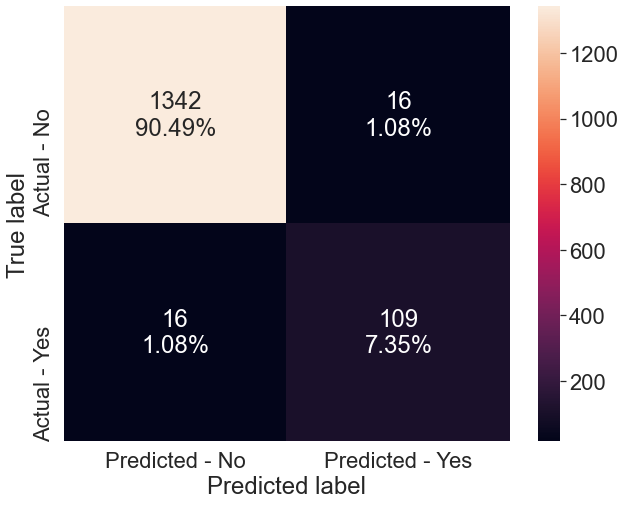

In [537]:
make_confusion_matrix(modelTree, Xdt_test, ydt_test)

### Visualizing the Tree

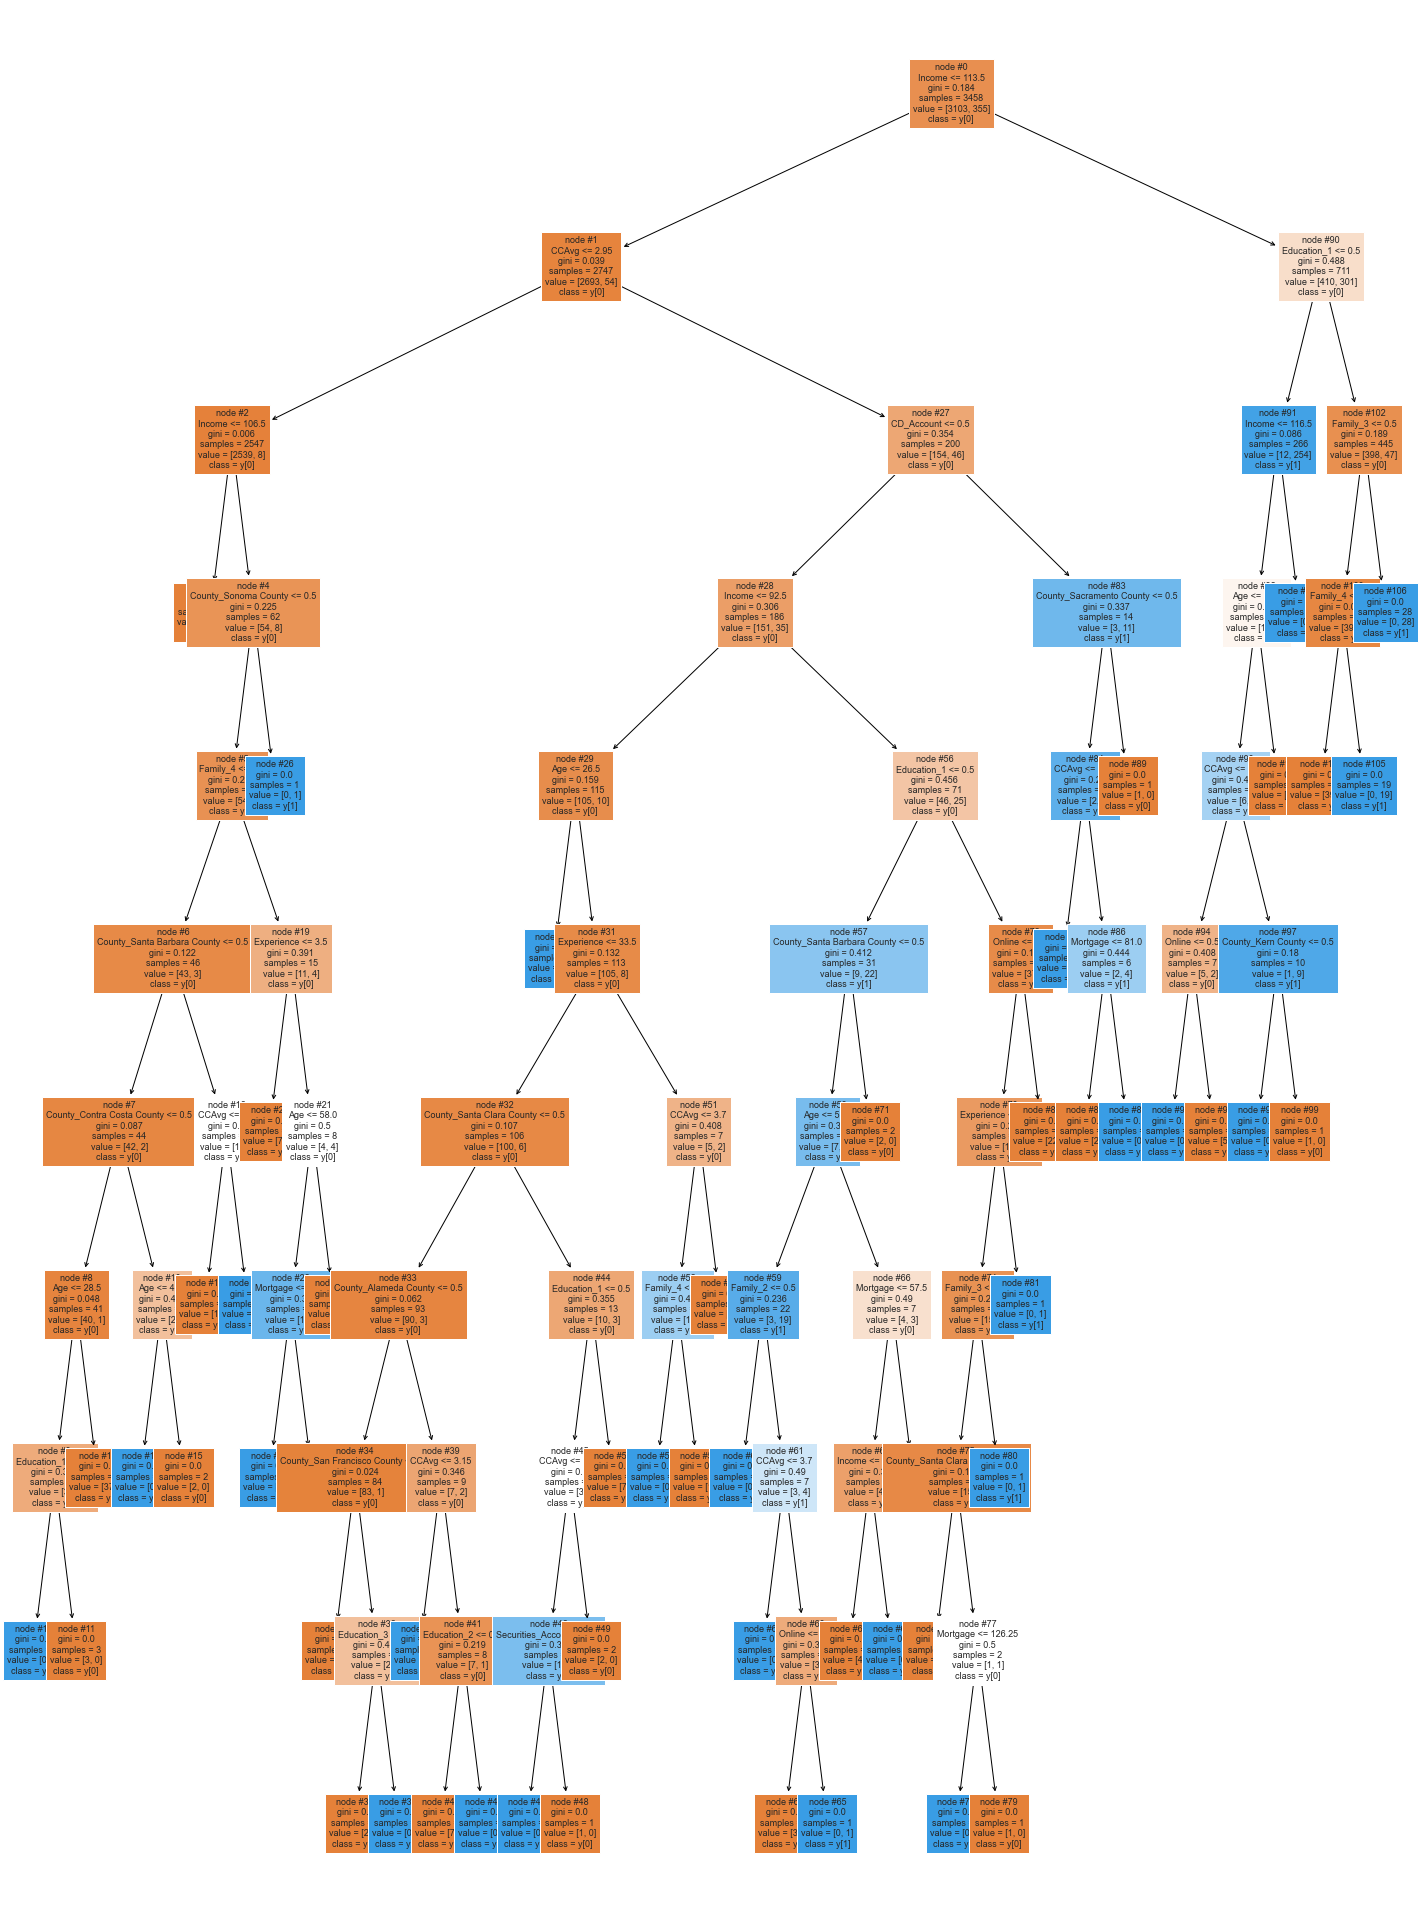

In [538]:
plt.figure(figsize=(25,35))
plot = tree.plot_tree(modelTree,feature_names=list(Xdt_train.columns),filled=True,fontsize=9,node_ids=True,class_names=True,)
#below code will add arrows to the decision tree split if they are missing
for o in plot:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

### Importance of features in the tree building

In [539]:
# Importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(modelTree.feature_importances_, columns = ["Imp"], index = Xdt_train.columns).sort_values(by = 'Imp', 
                                                                                                        ascending = False))

                                  Imp
Education_1                   0.40392
Income                        0.32226
Family_3                      0.07763
Family_4                      0.06046
CCAvg                         0.04744
Age                           0.02088
CD_Account                    0.01459
Mortgage                      0.01114
Online                        0.00770
Experience                    0.00632
County_Santa Barbara County   0.00462
County_Kern County            0.00283
County_Santa Clara County     0.00278
Family_2                      0.00275
Education_2                   0.00275
County_Sonoma County          0.00242
Securities_Account            0.00235
Education_3                   0.00209
County_Sacramento County      0.00209
County_Alameda County         0.00113
County_San Francisco County   0.00101
County_Contra Costa County    0.00084
County_Marin County           0.00000
County_Tuolumne County        0.00000
County_Siskiyou County        0.00000
County_Solan

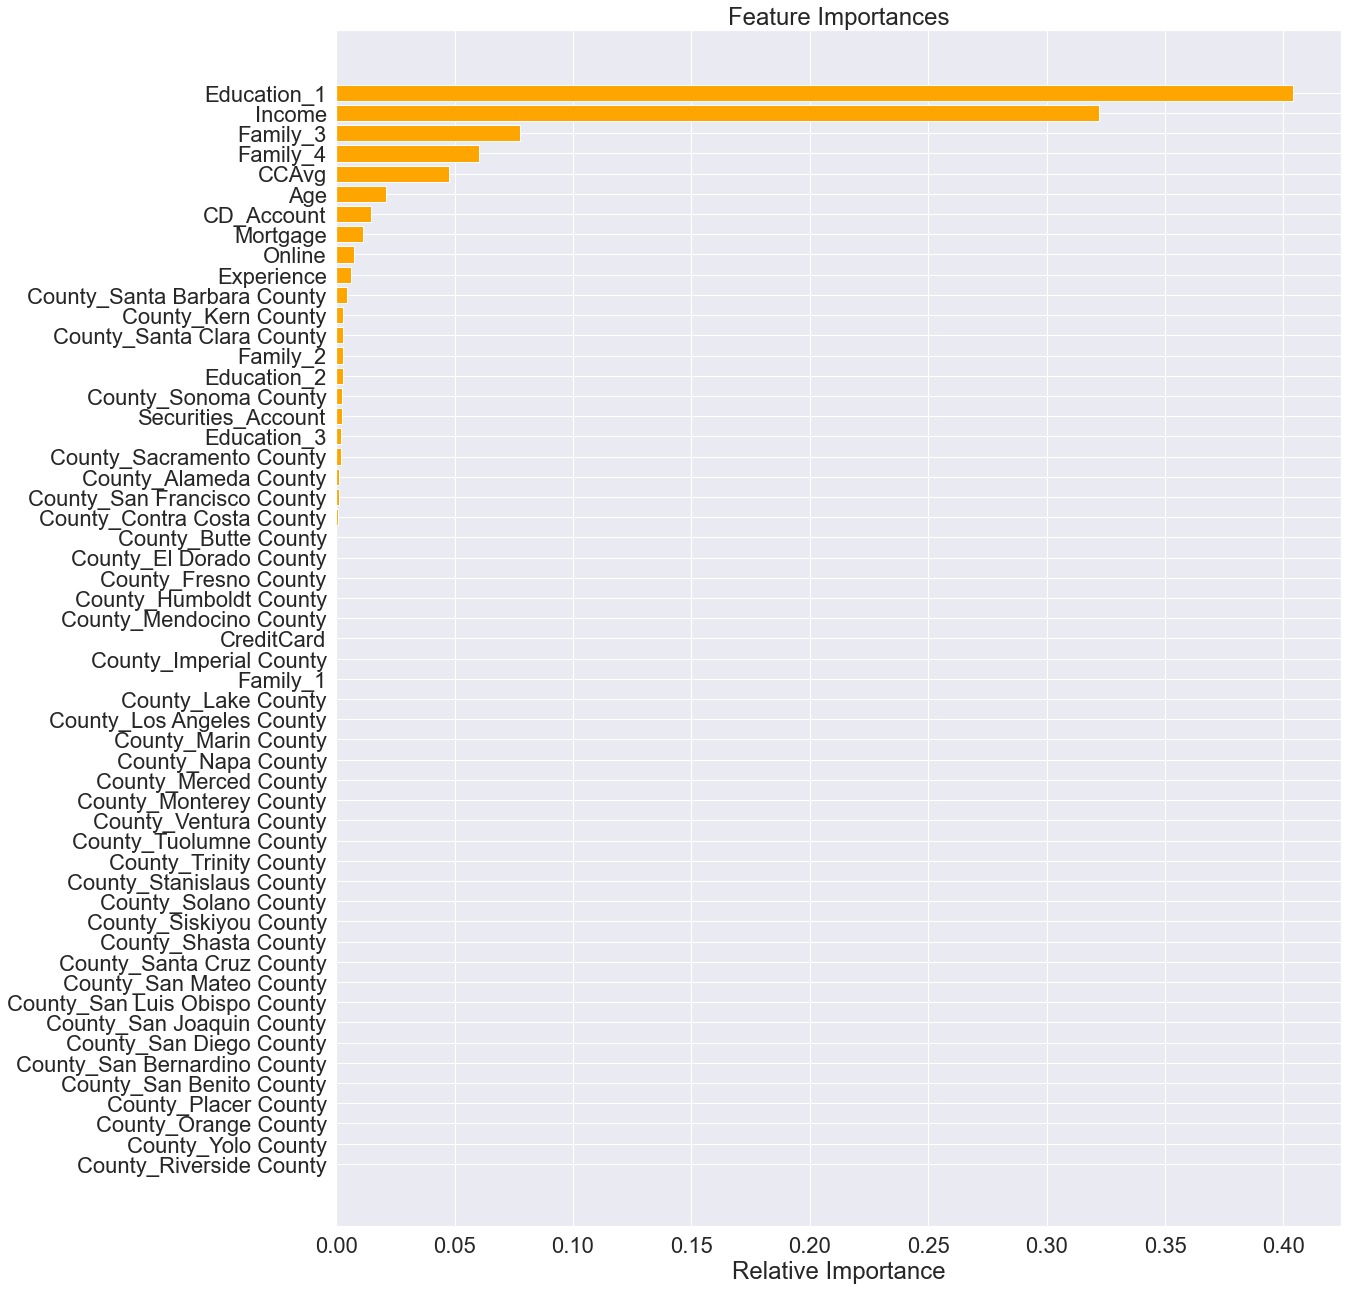

In [540]:
importances = modelTree.feature_importances_
indices = np.argsort(importances)
feature_names = list(Xdt_train.columns)

plt.figure(figsize=(18,22))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- According to this model, `Income`, `Education`, `Family`and `CCAvg` are the most importants features.
- However, a full grow tree like this one is too complex and usually suffer from overfitting.
- We are going to try to make it simplier while remaining performant.

### <a name = 'link333'>3.3.3 Pruning</a>

### <a name = 'a'>a) Pre-pruning by limiting the depth of the Tree</a>

In [541]:
modelTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
modelTree1.fit(Xdt_train, ydt_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

### Getting scores of the tree

In [542]:
dTree_scores1 = get_metrics_score2(modelTree1, Xdt_train, Xdt_test, ydt_train, ydt_test)

Accuracy on training set :  0.978
Accuracy on test set :  0.974
Recall on training set :  0.794
Recall on test set :  0.712
Precision on training set :  0.989
Precision on test set :  0.967
F1 on training set :  0.881
F1 on test set :  0.82


### Confusion matrix

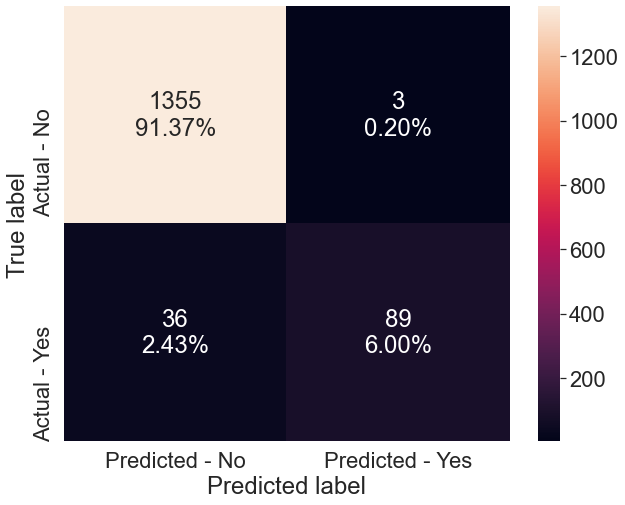

In [543]:
make_confusion_matrix(modelTree1, Xdt_test, ydt_test)

- The `recall` score has dropped.
- However, the model is more precise, that is when it flags someone as a potential buyer it can be trusted.

### Plotting the tree

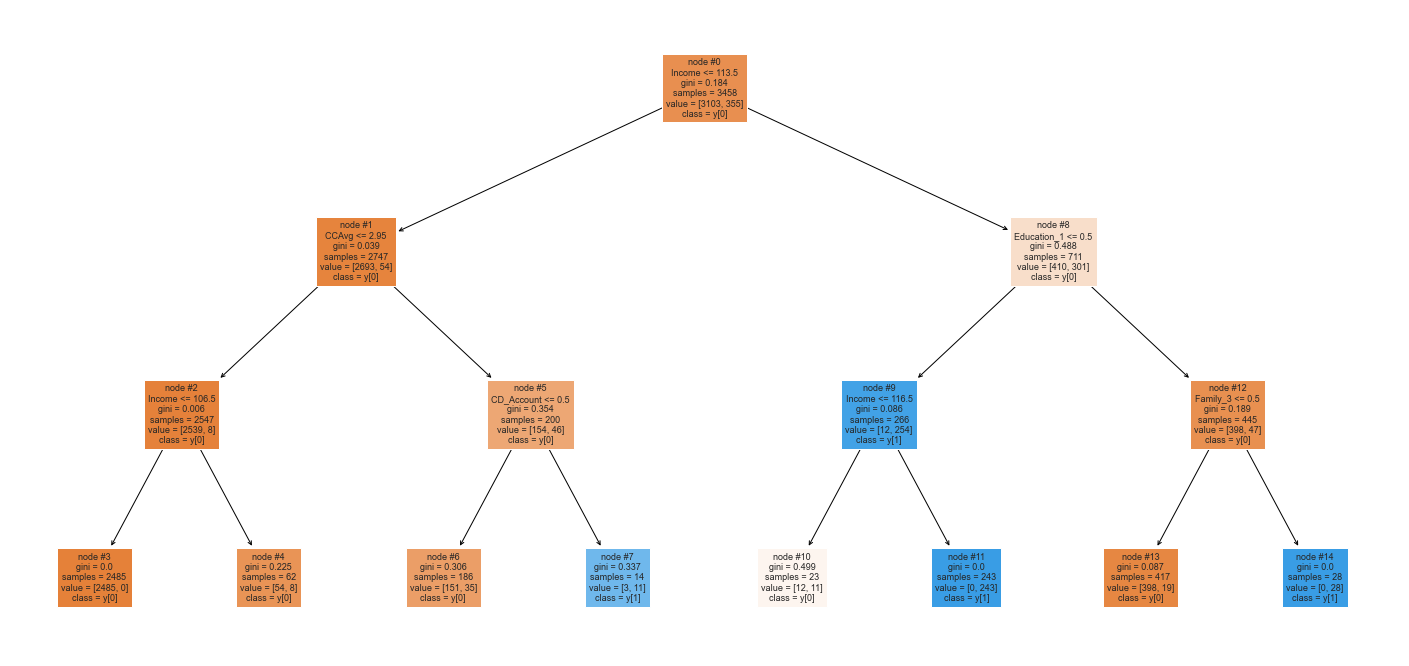

In [544]:
plt.figure(figsize=(25,12))
plot1=tree.plot_tree(modelTree1,feature_names=list(Xdt_train.columns),filled=True,fontsize=9,node_ids=True,class_names=True)
for o in plot1:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

### Features importance

In [545]:
print (pd.DataFrame(modelTree1.feature_importances_, columns = ["Imp"], index = Xdt_train.columns).sort_values(by = 'Imp', 
                                                                                                        ascending = False))

                                  Imp
Education_1                   0.46733
Income                        0.38441
Family_3                      0.09302
CCAvg                         0.03714
CD_Account                    0.01809
Age                           0.00000
County_Solano County          0.00000
County_San Francisco County   0.00000
County_San Joaquin County     0.00000
County_San Luis Obispo County 0.00000
County_San Mateo County       0.00000
County_Santa Barbara County   0.00000
County_Santa Clara County     0.00000
County_Santa Cruz County      0.00000
County_Shasta County          0.00000
County_Siskiyou County        0.00000
County_Trinity County         0.00000
County_Sonoma County          0.00000
County_Stanislaus County      0.00000
County_San Bernardino County  0.00000
County_Tuolumne County        0.00000
County_Ventura County         0.00000
County_Yolo County            0.00000
Education_2                   0.00000
Education_3                   0.00000
Family_1    

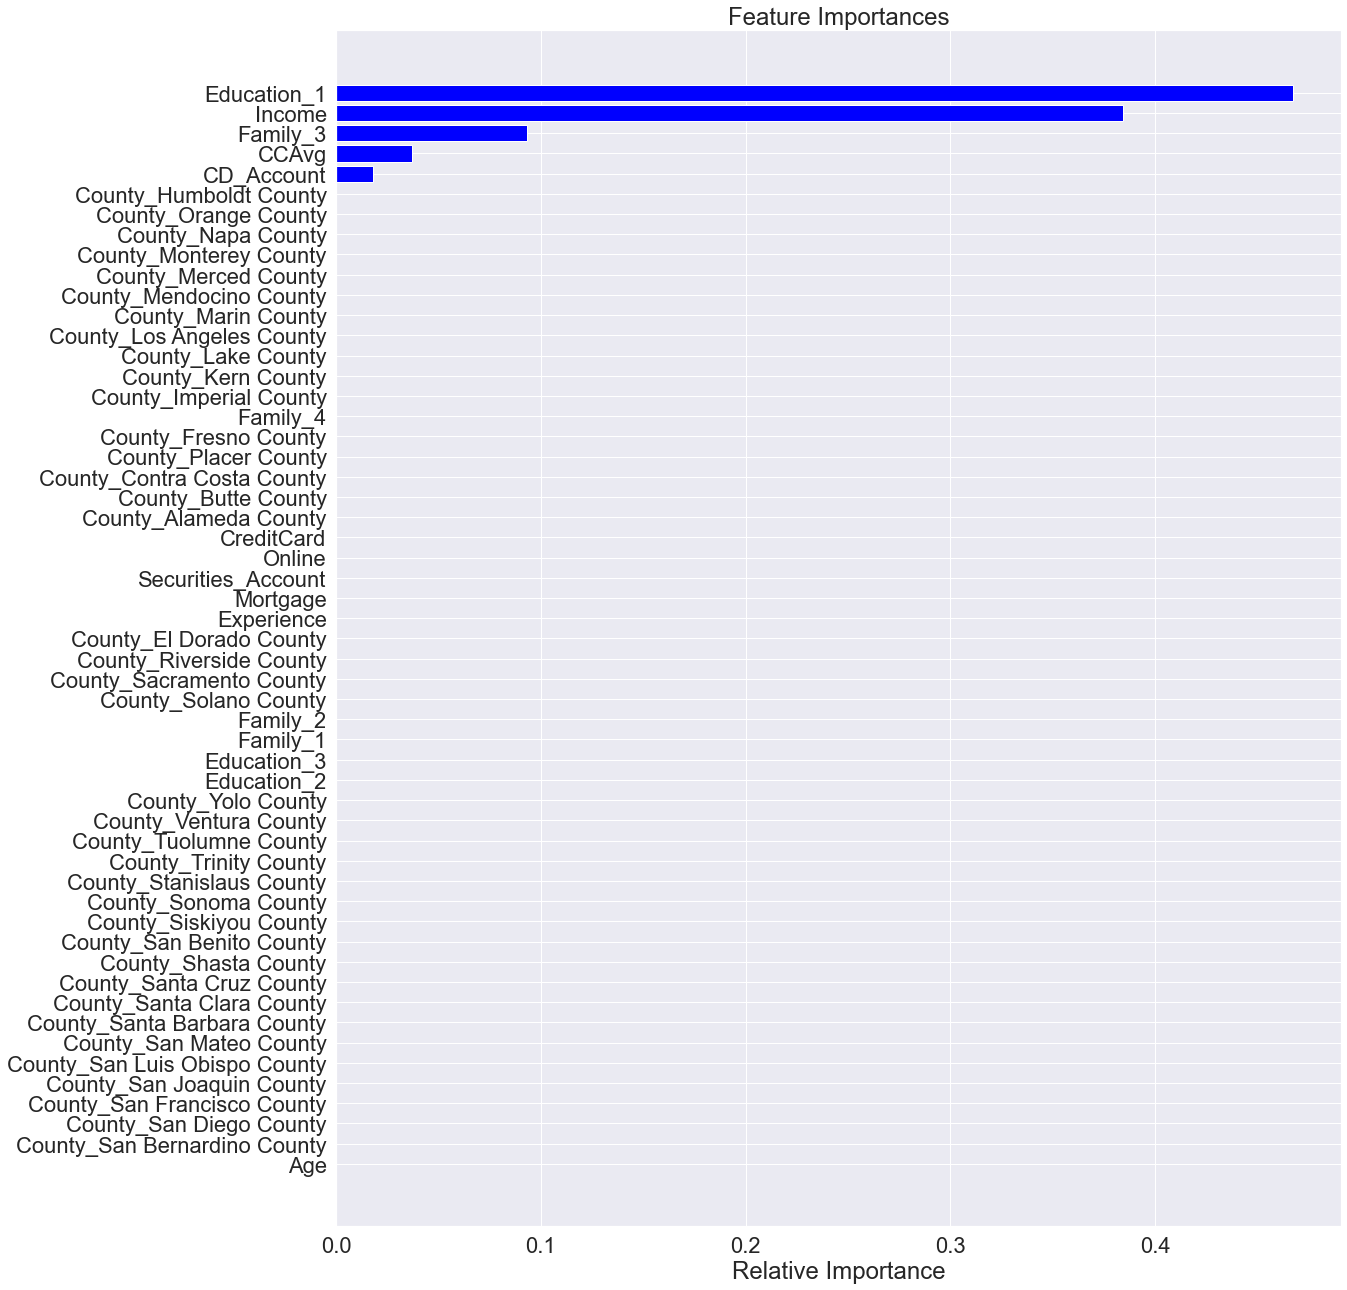

In [546]:
importances1 = modelTree1.feature_importances_
indices = np.argsort(importances1)
feature_names = list(Xdt_train.columns)

plt.figure(figsize=(18,22))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances1[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- `Income` remains the most important feature. Its importance even increased compared to the preious model tree.
- `Education` and `CCavg` keep their importance levels.
- `Family` looses its relative importance.

### <a name = 'linkb'>b) Pruning using GridSearch for Hyperparameter tuning</a>

In [547]:
# Choose the type of classifier. 
modelTree2 = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(modelTree2, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(Xdt_train, ydt_train)

# Set the clf to the best combination of parameters
modelTree2 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
modelTree2.fit(Xdt_train, ydt_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=10,
                       random_state=1)

### Getting the scores

In [548]:
dTree_scores2 = get_metrics_score2(modelTree2, Xdt_train, Xdt_test, ydt_train, ydt_test)

Accuracy on training set :  0.987
Accuracy on test set :  0.984
Recall on training set :  0.91
Recall on test set :  0.872
Precision on training set :  0.964
Precision on test set :  0.94
F1 on training set :  0.936
F1 on test set :  0.905


Though better compared to which on the previous model, `recall` on test data is still lower than the one of the fully grown tree.

### Confusion matrix

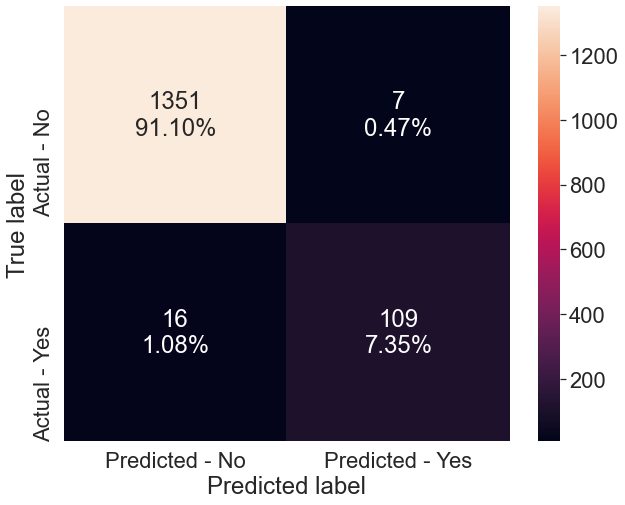

In [549]:
make_confusion_matrix(modelTree2, Xdt_test, ydt_test)

### Tree visualization

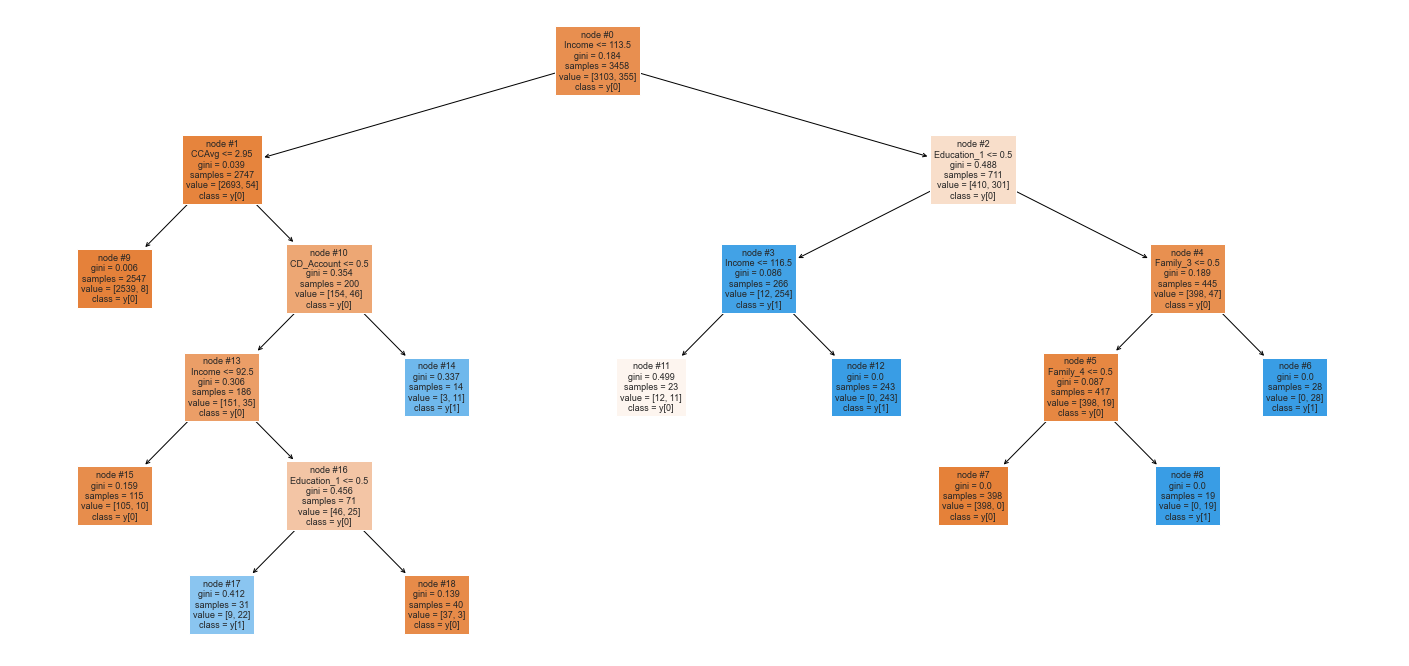

In [550]:
plt.figure(figsize=(25,12))
plot2=tree.plot_tree(modelTree2,feature_names=list(Xdt_train.columns),filled=True,fontsize=9,node_ids=True,class_names=True)
for o in plot2:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()

### Features importance

In [551]:
print (pd.DataFrame(modelTree2.feature_importances_, columns = ["Imp"], index = Xdt_train.columns).sort_values(by = 'Imp', 
                                                                                                        ascending = False))

                                  Imp
Education_1                   0.44728
Income                        0.35487
Family_3                      0.08410
Family_4                      0.06381
CCAvg                         0.03358
CD_Account                    0.01636
County_Solano County          0.00000
County_San Francisco County   0.00000
County_San Joaquin County     0.00000
County_San Luis Obispo County 0.00000
County_San Mateo County       0.00000
County_Santa Barbara County   0.00000
County_Santa Clara County     0.00000
County_Santa Cruz County      0.00000
County_Shasta County          0.00000
County_Siskiyou County        0.00000
County_Trinity County         0.00000
County_Sonoma County          0.00000
County_Stanislaus County      0.00000
County_San Bernardino County  0.00000
County_Tuolumne County        0.00000
County_Ventura County         0.00000
County_Yolo County            0.00000
Education_2                   0.00000
Education_3                   0.00000
Family_1    

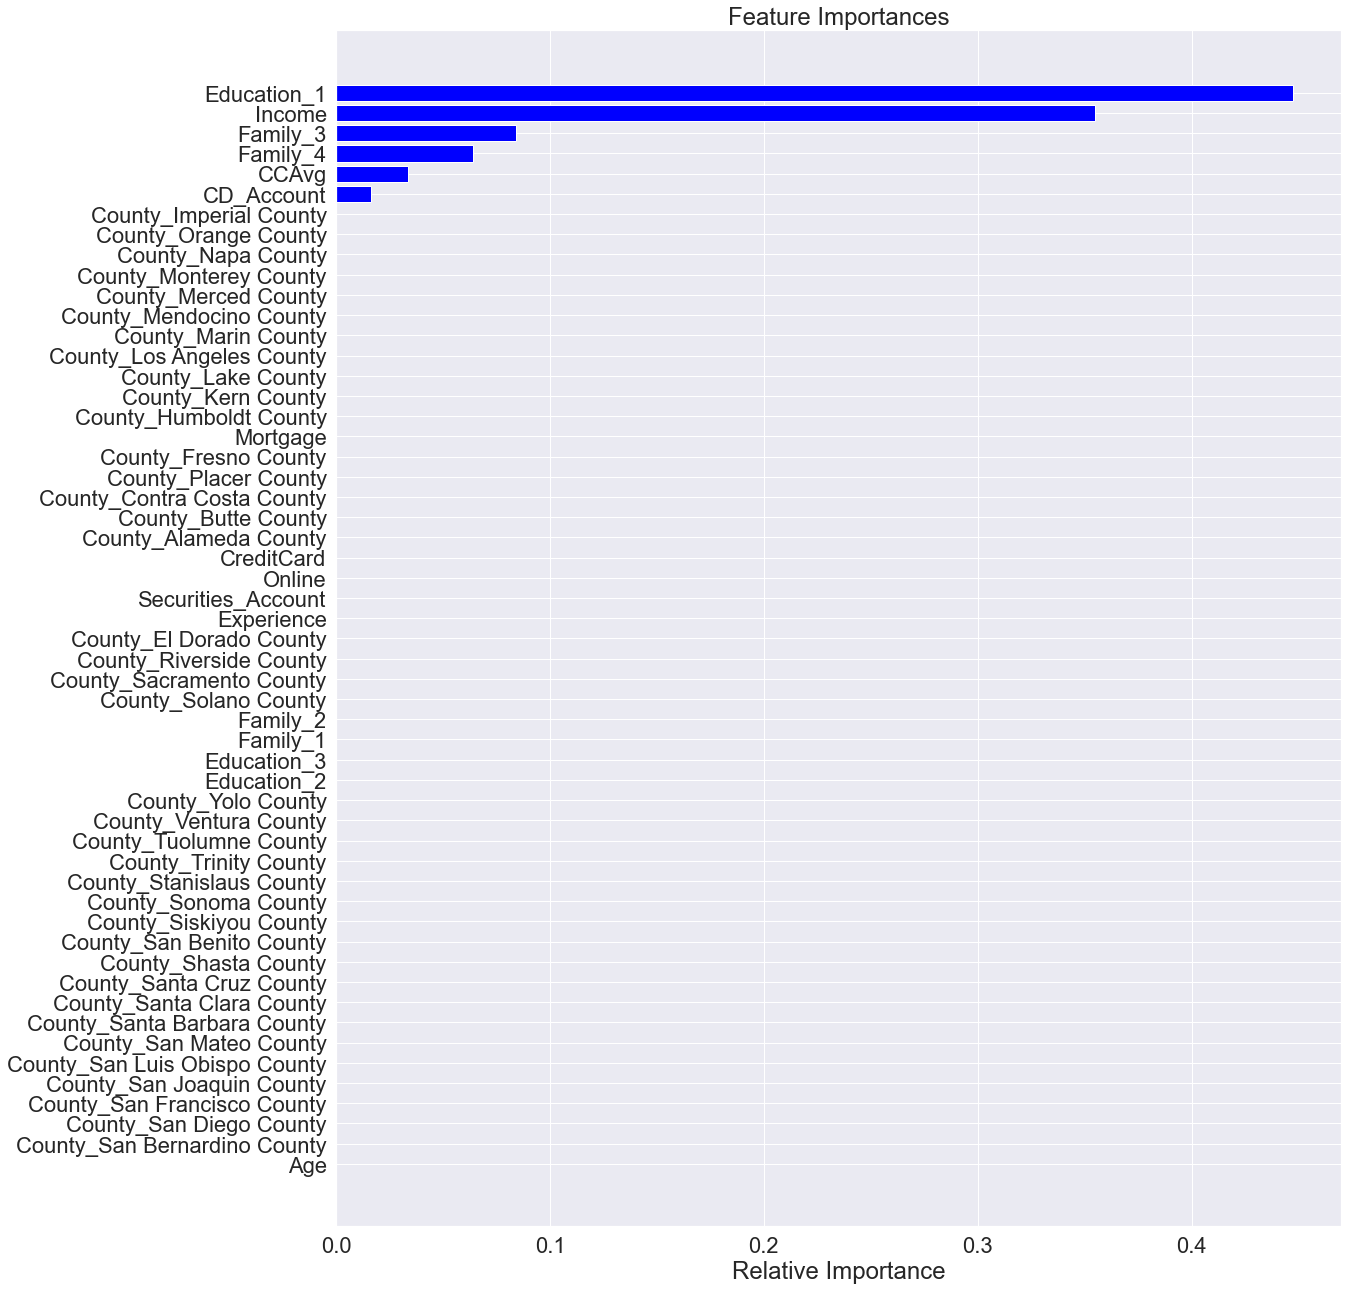

In [552]:
importances2 = modelTree2.feature_importances_
indices = np.argsort(importances2)
feature_names = list(Xdt_train.columns)

plt.figure(figsize=(18,22))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances2[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Here as well, `Income` is the most important feature, still followed by `Education`. `Family` comes back again.

### <a name ='linkc'>c) A post-pruning technique: Cost Complexity Pruning</a>

Since `Recall` is the metric that interest us the most in this study, we will be interested in the cost-complexity parameter that makes the model doing well on test data.

In [553]:
# First, we train the ful tree and retreive all the possible cost complexity parameters.

clas = DecisionTreeClassifier(random_state=1)
path = clas.cost_complexity_pruning_path(Xdt_train, ydt_train)
ccp_alphas = path.ccp_alphas

In [554]:
# Let's train all the models using the above retreived cost-complexity parameters. We keep the trained modeels in the clfs list.

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(Xdt_train, ydt_train)
    clfs.append(clf)

In [555]:
# Let's save the recall scores on training data for each of the models above.

recall_train=[]
for clf in clfs:
    pred_train=clf.predict(Xdt_train)
    values_train=metrics.recall_score(ydt_train,pred_train)
    recall_train.append(values_train)

In [556]:
# Saving the recall scores o testing data as well.
recall_test=[]
for clf in clfs:
    pred_test=clf.predict(Xdt_test)
    values_test=metrics.recall_score(ydt_test,pred_test)
    recall_test.append(values_test)

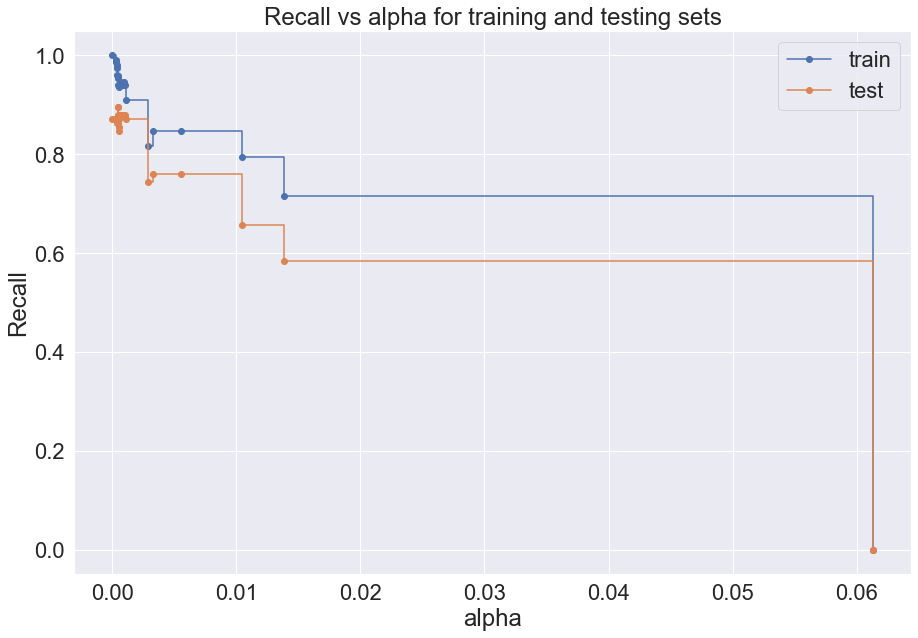

In [557]:
# Plot of the recall on training and testing data to visualize how they variate with respect to cost_comlexity parameter.

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

We can see that as the cost-complexity parameter increases:
- `Recall` on training data decreases.
- `Recall` on test data increase and at a certain point starts decreasing. That point ist the optimal value of cost-complexity parameter.

In [558]:
# Getting the optimal cost-complexity parameter

index_optimal_ccp = np.argmax(recall_test)
optimal_ccp_alpha = ccp_alphas[index_optimal_ccp]
optimal_ccp_alpha

0.0004626951995373047

In [559]:
# Retreiving the model where we get highest train and test recall

modelTree3 = clfs[index_optimal_ccp]

### Getting model scores

In [560]:
dTree_scores3 = get_metrics_score2(modelTree3, Xdt_train, Xdt_test, ydt_train, ydt_test)

Accuracy on training set :  0.994
Accuracy on test set :  0.987
Recall on training set :  0.955
Recall on test set :  0.896
Precision on training set :  0.988
Precision on test set :  0.941
F1 on training set :  0.971
F1 on test set :  0.918


- `Recall` on training data is **0.958** vs **1** with the fully grown tree.
- `Recall` on test data is **0.896** vs **0.88** with the fully grown tree.
- Besides, the model is more precise.

### Confusion matrix

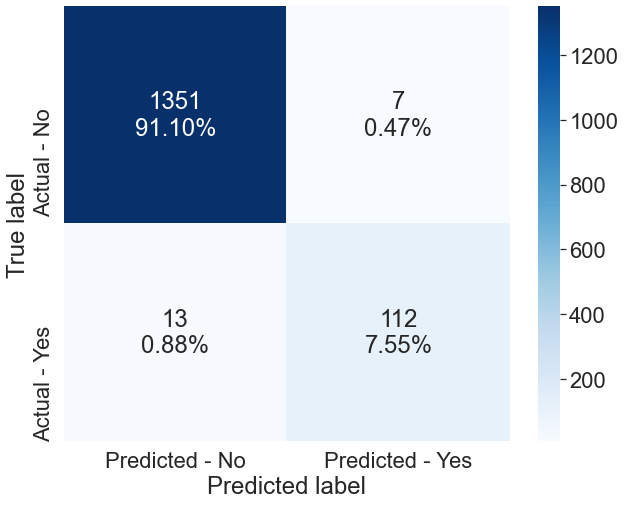

In [561]:
make_confusion_matrix(modelTree3, Xdt_test, ydt_test, color = 'Blues')

### Visualizing the Tree

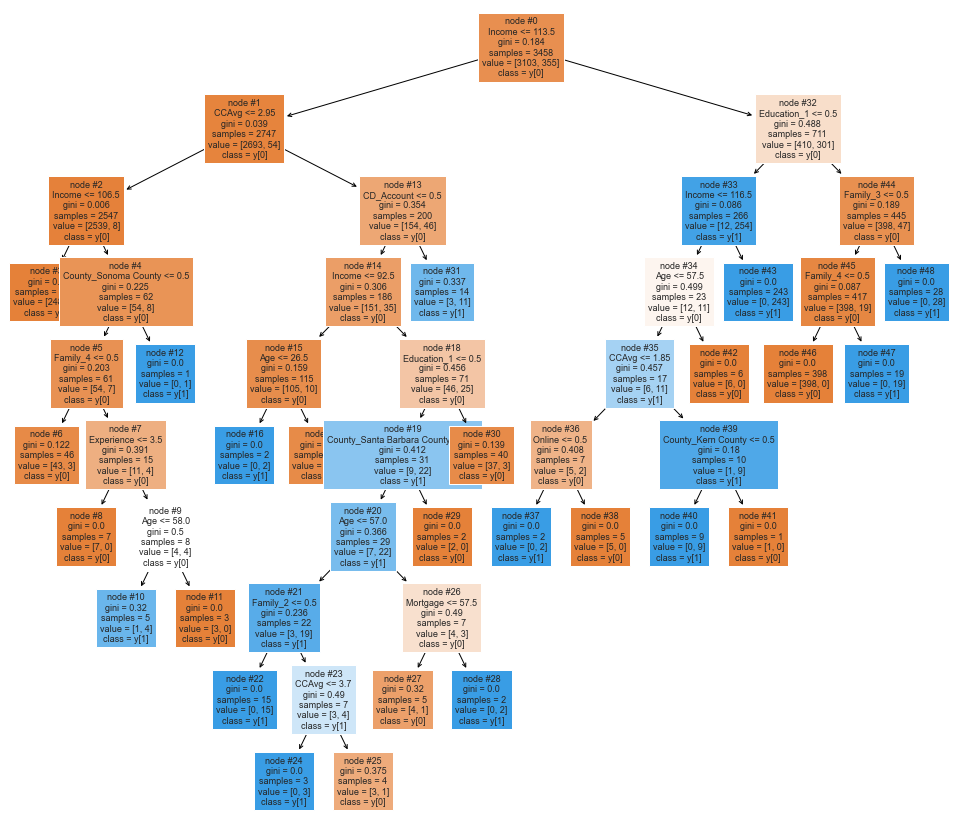

In [562]:
plt.figure(figsize=(17,15))

plot3=tree.plot_tree(modelTree3,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in plot3:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()

### Features importance

In [563]:
print (pd.DataFrame(modelTree3.feature_importances_, columns = ["Imp"], index = Xdt_train.columns).sort_values(by = 'Imp', 
                                                                                                        ascending = False))

                                  Imp
Education_1                   0.42253
Income                        0.33858
Family_3                      0.07945
Family_4                      0.06181
CCAvg                         0.04009
Age                           0.01914
CD_Account                    0.01545
Online                        0.00475
County_Santa Barbara County   0.00358
Experience                    0.00310
Mortgage                      0.00304
County_Kern County            0.00299
Family_2                      0.00291
County_Sonoma County          0.00256
County_Solano County          0.00000
County_San Luis Obispo County 0.00000
County_San Mateo County       0.00000
County_Santa Clara County     0.00000
County_Santa Cruz County      0.00000
County_Shasta County          0.00000
County_Siskiyou County        0.00000
County_Stanislaus County      0.00000
County_San Joaquin County     0.00000
County_Tuolumne County        0.00000
County_Ventura County         0.00000
County_Yolo 

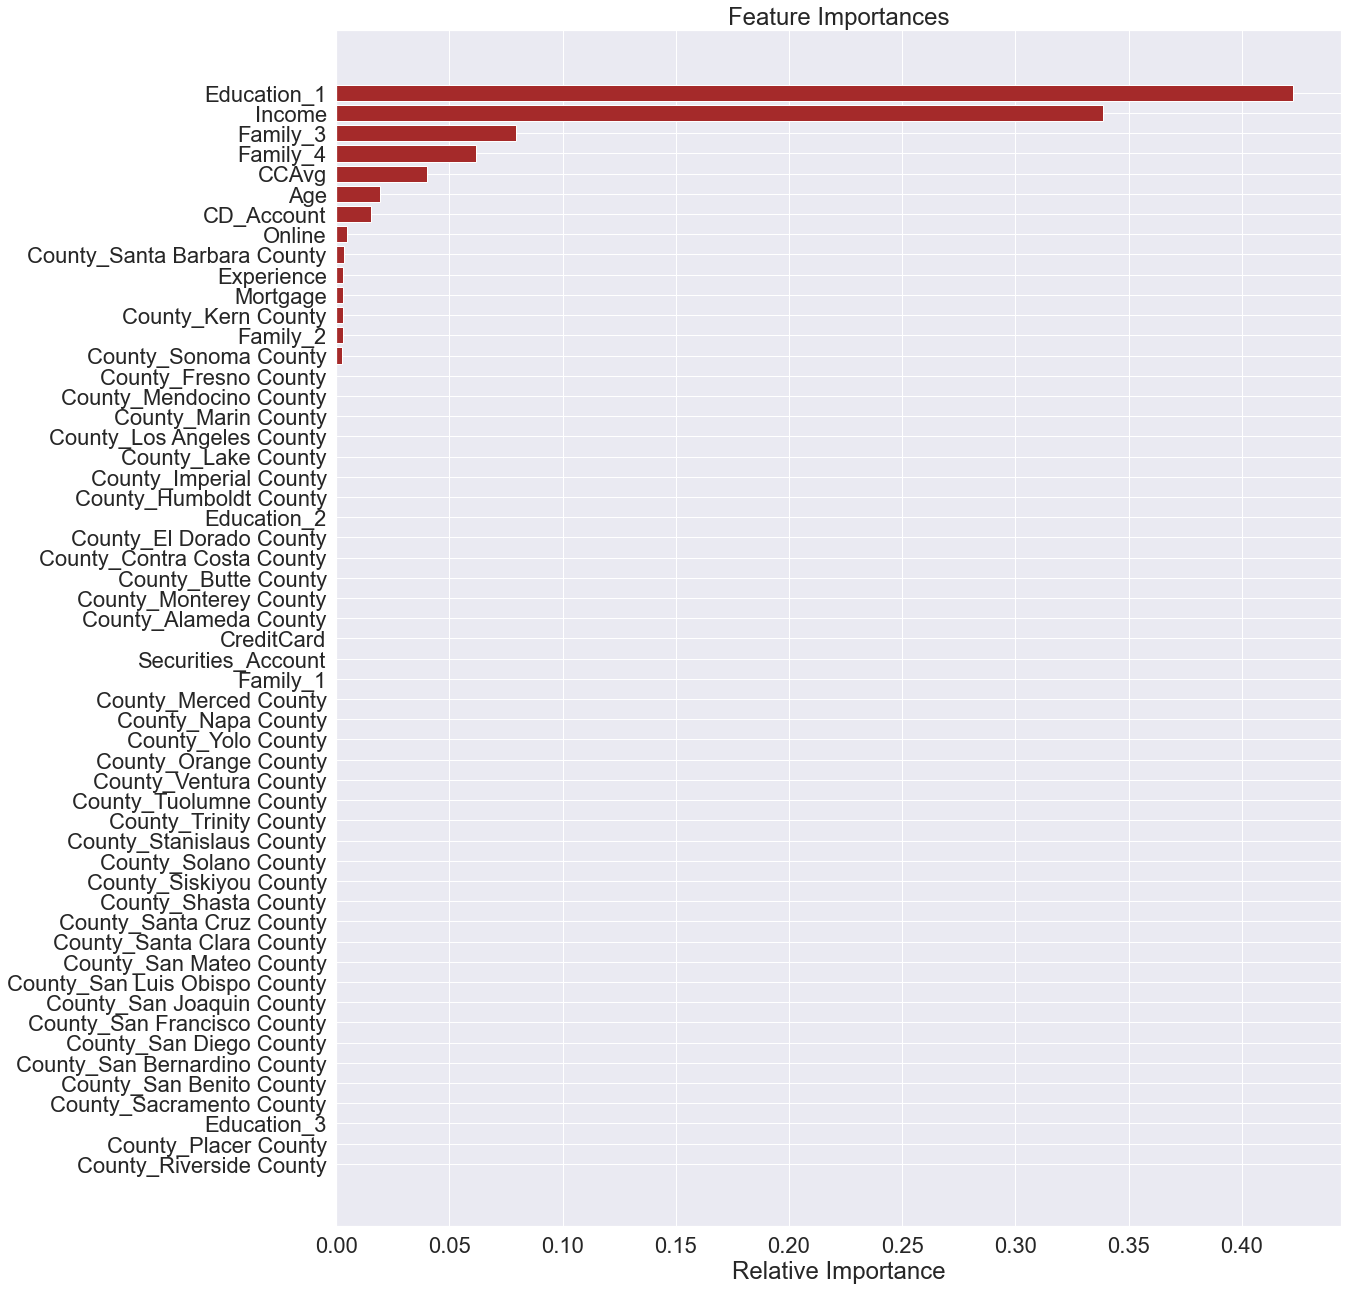

In [564]:
importances = modelTree3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,22))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='brown', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

`Income`, `Education`, `Family` and `CCAvg` turn out to be the most important parameters to perdict whether a customer will by a loan or not.

### <a name = 'link334'>3.3.4 Comparison of our Decision Tree models</a>

Let's make a chart to compare the different models we built. We compare them based on the `Recall` score that is the metric in interest here.

In [565]:
comparison_frame = pd.DataFrame({'Model':['Initial Decision Tree model','Decision Tree with restricted maximum depth',
                                          'Decision Tree with hyperparameter tuning', 'Decision Tree with post-pruning'], 
            'Train_Recall':[round(recall_score(ydt_train,modelTree.predict(Xdt_train)), 3), round(recall_score(ydt_train,modelTree1.predict(Xdt_train)), 3),
                            round(recall_score(ydt_train,modelTree2.predict(Xdt_train)), 3), round(recall_score(ydt_train,modelTree3.predict(Xdt_train)), 3)],
            'Test_Recall':[round(recall_score(ydt_test,modelTree.predict(Xdt_test)), 3), round(recall_score(ydt_test,modelTree1.predict(Xdt_test)), 3),
                            round(recall_score(ydt_test,modelTree2.predict(Xdt_test)), 3), round(recall_score(ydt_test,modelTree3.predict(Xdt_test)), 3)]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0                  Initial Decision Tree model       1.00000      0.87200
1  Decision Tree with restricted maximum depth       0.79400      0.71200
2     Decision Tree with hyperparameter tuning       0.91000      0.87200
3              Decision Tree with post-pruning       0.95500      0.89600

From the above chart, we notice that the model built by post-pruning the fully grown model is the best as it yields the highest `Recall` score.

### <a name = 'link335'>3.3.5 Analysing mislabeled observations</a>

Let's write a function to retreive mislabeled data.

In [566]:
def DT_mislabelled_data(model, df, X, y):
    '''
    Function to retrieve wrongly labeled observations.
    Parameters:
        model: The model that made the prediction
        df: The dataset being used for modeling
        X : Array of predictors
        y: Target variable
        
    The function stores the indexes of mislabeld observations and then use those indexes 
    to filter the dataset for the mislabeled observations.
    Returns dataframe of all the mislabeled, falsely positive labeled and falsely negative labeled observations respectively.
    '''
    
    idx_misTrue = []
    idx_misFalse = []
    idx_mislabel = []
    pred = model.predict(X)
    pred_df = pd.DataFrame(pred, index = y.index, columns=['predict'])
    for i in range(len(y)):
        if pred_df.iloc[i].values == 0 and y.iloc[i].values == 1:
            idx = y.index[i]
            idx_misFalse.append(idx)
            idx_mislabel.append(idx)
        elif pred_df.iloc[i].values == 1 and y.iloc[i].values == 0:
            idx = y.index[i]
            idx_misTrue.append(idx)
            idx_mislabel.append(idx)
    DT_data_misTrue = df.loc[idx_misTrue]
    DT_data_misFalse = df.loc[idx_misFalse]
    DT_data_mislabel = df.loc[idx_mislabel]
    return DT_data_mislabel, DT_data_misTrue, DT_data_misFalse

In [567]:
DT_data_mislabel, DT_data_misTrue, DT_data_misFalse = DT_mislabelled_data(modelTree3, bank_dt, Xdt_test, ydt_test)

In [568]:
# Data wrongly labeled to have bought a loan
DT_data_misTrue

Age  Experience  Income Family   CCAvg Education  Mortgage  \
12     48          23     114      2 3.80000         3         0   
2470   33           7      81      2 4.50000         3       187   
950    32           6     112      4 1.80000         2         0   
4671   39          14     104      1 4.00000         3         0   
402    54          28      93      1 4.90000         1       133   
1966   52          26     114      2 2.40000         2         0   
1972   28           2     114      4 2.10000         3         0   

     Personal_Loan Securities_Account CD_Account Online CreditCard  \
12               0                  1          0      0          0   
2470             0                  0          1      1          1   
950              0                  0          0      1          0   
4671             0                  0          1      1          1   
402              0                  0          1      1          1   
1966             0                  0          0      0          0   
1972             0                  0          0      1          0   

                    County  
12    Santa Barbara County  
2470      San Diego County  
950     Santa Clara County  
4671    Santa Clara County  
402     Los Angeles County  
1966    Los Angeles County  
1972        Alameda County

In [569]:
# Data wrongly labeled not to have bought a loan

DT_data_misFalse

Age  Experience  Income Family   CCAvg Education  Mortgage  \
4604   32           7      81      2 3.40000         2         0   
1577   34           8      65      1 3.00000         1       227   
4583   52          26      83      1 3.10000         1         0   
1069   44          18      75      2 3.50000         1         0   
4702   35           5     108      2 2.75000         3         0   
951    59          34      83      2 3.40000         3         0   
2533   54          29     111      1 1.10000         2         0   
2584   59          34     114      3 4.20000         2         0   
3318   46          20     105      4 3.20000         1         0   
1176   29           3     103      4 3.40000         1         0   
3992   47          22      95      2 3.90000         2         0   
4302   52          27      85      3 3.40000         3         0   
1062   47          21      83      1 3.80000         1        97   

     Personal_Loan Securities_Account CD_Account Online CreditCard  \
4604             1                  0          0      0          1   
1577             1                  0          0      1          0   
4583             1                  0          0      1          0   
1069             1                  0          0      1          0   
4702             1                  1          0      0          0   
951              1                  0          0      1          0   
2533             1                  0          0      1          0   
2584             1                  0          0      1          0   
3318             1                  0          0      0          0   
1176             1                  0          0      1          0   
3992             1                  0          0      0          0   
4302             1                  0          0      0          0   
1062             1                  0          0      0          0   

                    County  
4604    Los Angeles County  
1577      San Diego County  
4583      Riverside County  
1069    Los Angeles County  
4702         Orange County  
951   San Francisco County  
2533        Ventura County  
2584        Alameda County  
3318    Los Angeles County  
1176    Los Angeles County  
3992           Kern County  
4302      San Diego County  
1062      Riverside County

In [570]:
# All mislabeled data
DT_data_mislabel

Age  Experience  Income Family   CCAvg Education  Mortgage  \
4604   32           7      81      2 3.40000         2         0   
12     48          23     114      2 3.80000         3         0   
1577   34           8      65      1 3.00000         1       227   
4583   52          26      83      1 3.10000         1         0   
2470   33           7      81      2 4.50000         3       187   
1069   44          18      75      2 3.50000         1         0   
4702   35           5     108      2 2.75000         3         0   
951    59          34      83      2 3.40000         3         0   
2533   54          29     111      1 1.10000         2         0   
950    32           6     112      4 1.80000         2         0   
2584   59          34     114      3 4.20000         2         0   
3318   46          20     105      4 3.20000         1         0   
1176   29           3     103      4 3.40000         1         0   
4671   39          14     104      1 4.00000         3         0   
3992   47          22      95      2 3.90000         2         0   
4302   52          27      85      3 3.40000         3         0   
1062   47          21      83      1 3.80000         1        97   
402    54          28      93      1 4.90000         1       133   
1966   52          26     114      2 2.40000         2         0   
1972   28           2     114      4 2.10000         3         0   

     Personal_Loan Securities_Account CD_Account Online CreditCard  \
4604             1                  0          0      0          1   
12               0                  1          0      0          0   
1577             1                  0          0      1          0   
4583             1                  0          0      1          0   
2470             0                  0          1      1          1   
1069             1                  0          0      1          0   
4702             1                  1          0      0          0   
951              1                  0          0      1          0   
2533             1                  0          0      1          0   
950              0                  0          0      1          0   
2584             1                  0          0      1          0   
3318             1                  0          0      0          0   
1176             1                  0          0      1          0   
4671             0                  0          1      1          1   
3992             1                  0          0      0          0   
4302             1                  0          0      0          0   
1062             1                  0          0      0          0   
402              0                  0          1      1          1   
1966             0                  0          0      0          0   
1972             0                  0          0      1          0   

                    County  
4604    Los Angeles County  
12    Santa Barbara County  
1577      San Diego County  
4583      Riverside County  
2470      San Diego County  
1069    Los Angeles County  
4702         Orange County  
951   San Francisco County  
2533        Ventura County  
950     Santa Clara County  
2584        Alameda County  
3318    Los Angeles County  
1176    Los Angeles County  
4671    Santa Clara County  
3992           Kern County  
4302      San Diego County  
1062      Riverside County  
402     Los Angeles County  
1966    Los Angeles County  
1972        Alameda County

**Notes:**
- Data wrongly labeled for having bought a loan have high income values. THat ist consistent with the model which gives `Income` to be of high importance in predicting loan purchaser. They also have an average monthy credit card consumption that is high consistently with the model.


<AxesSubplot:xlabel='Income', ylabel='Personal_Loan'>

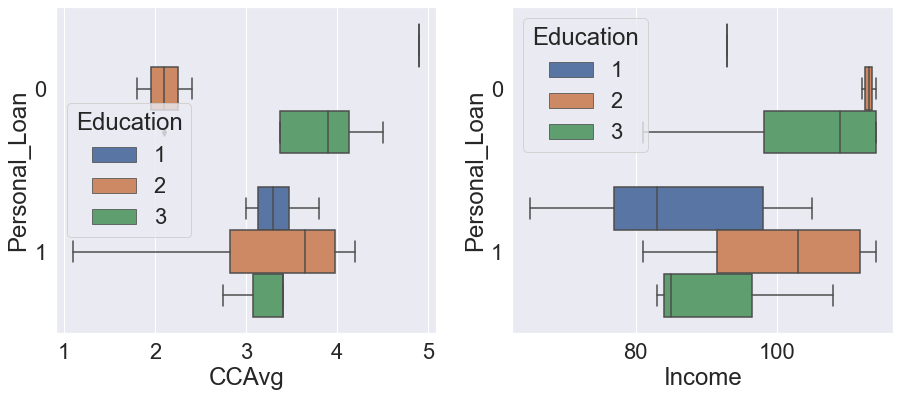

In [571]:
f, ax =plt.subplots(1, 2, figsize = (15, 6))
sns.boxplot(data=DT_data_mislabel, x = 'CCAvg', y='Personal_Loan', orient='h', hue='Education', ax=ax[0])
sns.boxplot(data=DT_data_mislabel, x = 'Income', y='Personal_Loan', orient='h', hue='Education', ax=ax[1])

**Observations:**
- Customers who were predicted to have denied the loan when they acctually accepted it are in majority undergrad with an high credit card consumpltion per month and not high income.

## <a name = 'link34'>3.4 Logistic Regression and Decision Tree models comparison</a>

Let's compare how our best Logistic Regression and Decision Tree models compare.

In [572]:
# Make a datar frame to compare both classifiers on different metrics

cm_LR_train = confusion_matrix( y_train, lg2.predict(X_train2)>.5, labels=[1,0])
cm_LR_test = confusion_matrix( y_test, lg2.predict(X_test2)>.5, labels=[1,0])
cm_DT_train = metrics.confusion_matrix( ydt_train, modelTree3.predict(Xdt_train), labels=[1,0])
cm_DT_test = metrics.confusion_matrix( ydt_test, modelTree3.predict(Xdt_test), labels=[1,0])


compare_LR_DT =pd.DataFrame({'Model type': ['Logistic Regression', 'Decision Tree'],
                      
'Training Recall': [round(recall_score(y_train, lg2.predict(X_train2)>.5), 2), round(recall_score(ydt_train,modelTree3.predict(Xdt_train)), 2)],
'Test Recall': [round(recall_score(y_test, lg2.predict(X_test2)>.5), 2), round(recall_score(ydt_test,modelTree3.predict(Xdt_test)), 2)],
'Training F1 score': [round(f1_score(y_train, lg2.predict(X_train2)>.5), 2), round(f1_score(ydt_train, modelTree3.predict(Xdt_train)), 2)],
'Test F1 score': [round(f1_score(y_test, lg2.predict(X_test2)>.5), 2), round(f1_score(ydt_test,modelTree3.predict(Xdt_test)), 2)],
'Training Precision': [round(precision_score(y_train, lg2.predict(X_train2)>.5), 2), round(precision_score(ydt_train ,modelTree3.predict(Xdt_train)), 2)],
'Test Precision': [round(precision_score(y_test, lg2.predict(X_test2)>.5), 2), round(precision_score(ydt_test,modelTree3.predict(Xdt_test)), 2)],
'Training False Positive': [cm_LR_train[1,0], cm_DT_train[1,0]],
'Test False Positive': [cm_LR_test[1,0], cm_DT_test[1,0]],
'Training False Negative': [cm_LR_train[0,1], cm_DT_train[0,1]],
'Test False Negative': [cm_LR_test[0,1], cm_DT_test[0,1]]
                            })

compare_LR_DT

Model type  Training Recall  Test Recall  Training F1 score  \
0  Logistic Regression          0.75000      0.69000            0.82000   
1        Decision Tree          0.95000      0.90000            0.97000   

   Test F1 score  Training Precision  Test Precision  Training False Positive  \
0        0.79000             0.90000         0.91000                       29   
1        0.92000             0.99000         0.94000                        4   

   Test False Positive  Training False Negative  Test False Negative  
0                    8                       89                   39  
1                    7                       16                   13

**Note of comparison:**
- Decision Tree model beats Logistic Regression's on all metrics. It is by far a better model.
- Both classifiers identified the same variables as significantly influencing the chance of a customer to buy a loan. As a reminder, these variables are: `Income`, `Education`, `CCAvg`, `Family`.
- The two models have two disjoints sets of data that were wrongly labeled as loan purchasers. But apart from two observations, all that were wrongly labeled as not having purchased a loan by the Decision Tree are included in the false negative set of Logistic Regression.

# <a name = 'link4'>Conclusion</a>

We built two model to help `All Life Bank` predict which ctaegories of its customers are more likely to purchase a private loan: A `Logistic Regression` model and a `Decision Tree` model.
- The `Decision Tree` model performed better the=an the `Logistic Regression` model.
- Both model identified the same variables as important predictors of a loan purchaser.
- Potential loan purchaser are to found among people with high `Income`, high `CCAvg`; the more educated they will be, the more chance for them to purchase the loan.